# EDA, FE and Logistic Regression Model (Algerian Forest Fires Dataset)
## Shubham Verma

**Follow me on Linkedin:** https://lnkd.in/gPxctEja

**Follow me on GitHub:** https://lnkd.in/gky-wyFJ

**For the code please check out my Machine Learning repository on GitHub**

### 1. EDA and FE
1. Data Profiling
2. Stastical analysis
3. Graphical Analysis
4. Data Cleaning
5. Data Scaling

### 2. Logistic Regression Model (Classification)
1. Logistic Regression Model
2. Performance metrics for above model
3. Creating Imbalanced dataset
4. Balancing dataset using imbalanced library
5. EDA on balanced dataset
6. New Logistic Regression Model for Imbalanced dataset
7. Performance metrics for new model
8. Performance comparison for both models

**Dataset:** https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

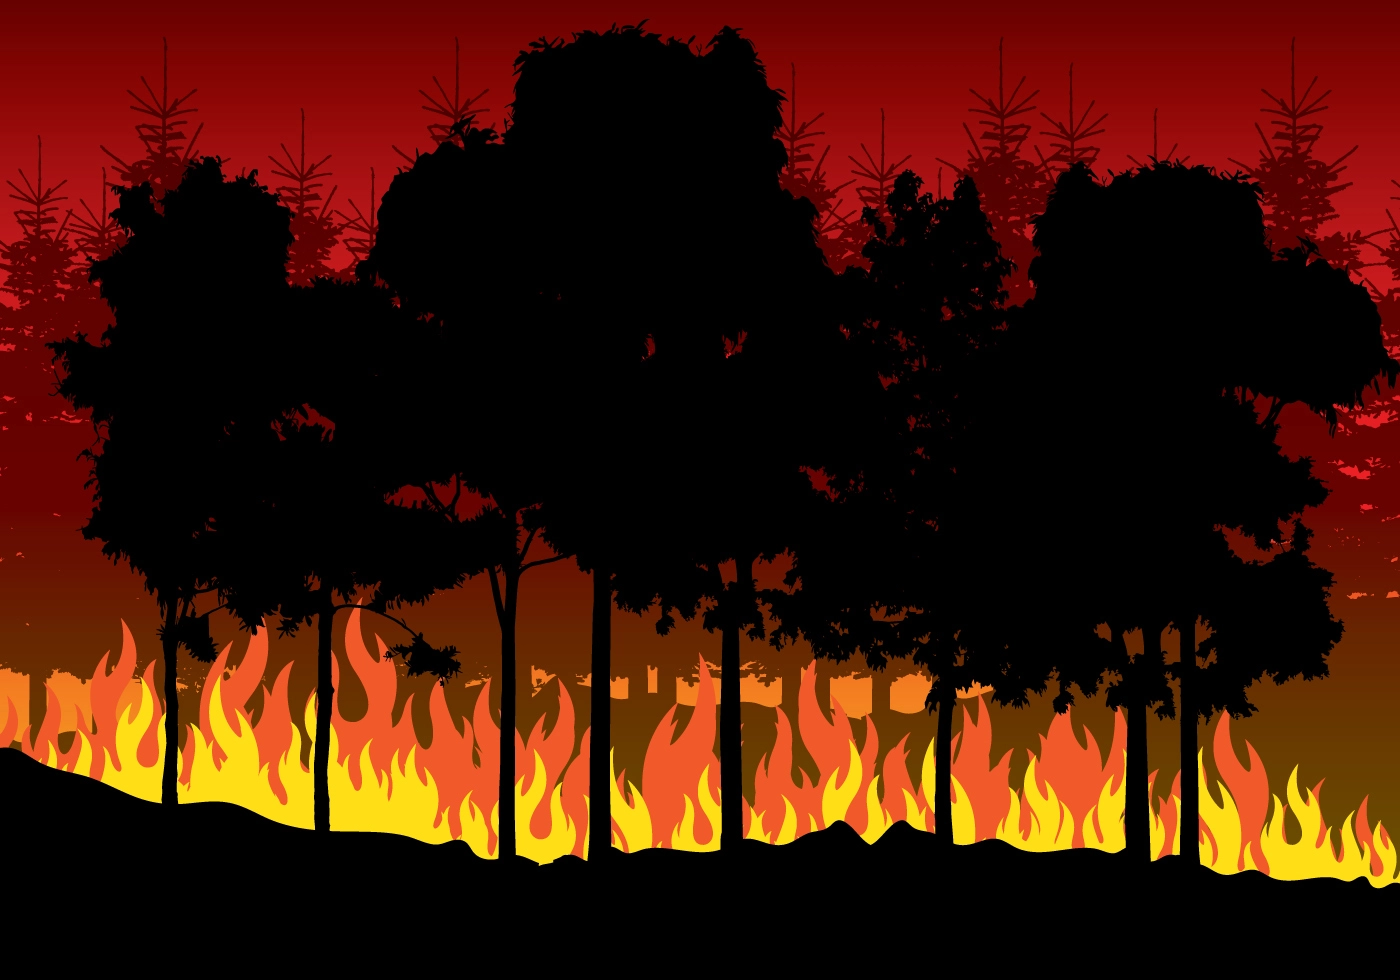

In [1]:
from IPython import display
display.Image("forrestfire.png")

## <span style='color:red '>1.0 Importing required libraries</span>

In [2]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

### To save the model
import pickle

## <span style='color:red '>2.0 Importing Dataset and Cleaning the Data</span>

In [3]:
### reading csv file 
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1 )

dataset.iloc[121:].head(4) # index 122, 123 need to be removed from dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


### <span style='color:red '>2.1 Info about dataset and its attributes</span>


1. The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for each region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (classes)
5. The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes.

### Attributes

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

**FWI Components**

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

### <span style='color:red '>2.2 Dropping rows which have no information</span>

In [4]:
#dropping rows having region name and headder
dataset.drop(index=[122,123], inplace=True) # droping row 122,123 from dataset
dataset.reset_index(inplace=True)
dataset.drop('index', axis=1, inplace=True)

dataset.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


### <span style='color:red '>2.3 Creating Region feature</span>

In [5]:
### creating feature called Region 0 for Bejaia region and 1 for Sidi Bel-abbes region
dataset.loc[:122,'Region']=0
dataset.loc[122:, 'Region']=1

dataset.iloc[120:].head(8)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1.0


### <span style='color:red '>2.4 Datatypes and describe</span>

In [6]:
# here it is visible that all datatypes are in object 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [7]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
day,244,31,01,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,244,4,07,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,244,1,2012,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,244,19,35,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,244,62,64,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ws,244,18,14,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rain,244,39,0,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFMC,244,173,88.9,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DMC,244,166,7.9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC,244,198,8,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <span style='color:red '>2.5 Data Cleaning</span>

In [8]:
# here it is visible that some columns have spaces in the names like RH, Ws
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [9]:
# stripping spaces from column names
dataset.columns= [col_name.strip() for col_name in dataset.columns]
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
### converting all feature values to string so that we can do data cleaning as shown below.
dataset=dataset.astype(str)

In [11]:
### somes values in colums also have space
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    dataset[feature]= dataset[feature].str.replace(" ","")

In [12]:
### index no 165 for feature name FWI has value fire
dataset[dataset['FWI']== 'fire'].index

Int64Index([165], dtype='int64')

In [13]:
### replacing fire value witha float value
dataset.loc[165,'FWI']=' 0.1'

In [14]:
### replacing nan value wit fire to make data equal to the info given in dataset 
dataset[dataset['Classes']== 'nan'].index
dataset.loc[165,'Classes']='fire'

In [15]:
### encoding classes feature
dataset['Classes']=dataset['Classes'].str.replace('notfire','0')
dataset['Classes']=dataset['Classes'].str.replace('fire','1')

In [16]:
### Dropping year feature as data is realted to year 2012.
dataset.drop('year', axis=1, inplace=True)

### <span style='color:red '>2.6 Changing datatype to Numerical from Object</span>

In [17]:
### changing datatypes of features to numerical for numerical features as all are in object

datatype_convert={'day':'int64', 'month':'int64', 'Temperature':'int64', 'RH':'int64', 'Ws':'int64',
                  'Rain':'float64', 'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64',
                  'FWI':'float64', 'Classes':'int64', 'Region':'float64'}

dataset=dataset.astype(datatype_convert)
dataset.dtypes

day              int64
month            int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

In [18]:
dataset.shape

(244, 14)

### <span style='color:red '>2.7 Checking Null values and Duplicates</span>

In [19]:
### checking for null values

dataset.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [20]:
dataset[dataset.duplicated()]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


### <span style='color:blue'>Observation</span>

1. There is no null value in dataset.
2. Total 244 rowws and 15 columns is present.
3. There is no duplicate observation in dataset.

## <span style='color:red '>3.0 Analysis of Features</span>

### <span style='color:red '>3.1 Comparing Classes and Region features</span>

In [21]:
### 0 is not fire and 1 i fire for Classes
### 0 is Bejaia region and 1 is Sidi Bel-abbes region 
data_pie=dataset.groupby(['Classes','Region']).agg({'Classes':['count']})
data_pie

Classes
                 count
Classes Region        
0       0.0         63
        1.0         43
1       0.0         59
        1.0         79

<AxesSubplot:ylabel='count'>

<Figure size 504x432 with 0 Axes>

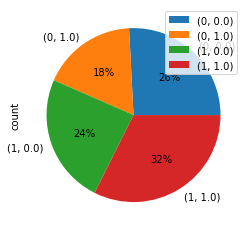

In [22]:
### Plotting Pie chart
### Here 0, 1 is not fire and fire respectively
### Here 0.0 and 1.0 is Bejaia region and Sidi Bel-abbes region respectively
plt.figure(figsize=(7,6))
data_pie.plot(kind='pie', y='Classes', autopct='%1.0f%%')

<AxesSubplot:xlabel='Classes', ylabel='count'>

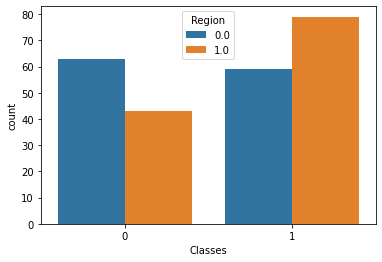

In [23]:
### 0 is not fire and 1 i fire for Classes
### 0 is Bejaia region and 1 is Sidi Bel-abbes region 
sns.countplot(data=dataset, x='Classes', hue='Region')

### <span style='color:blue'>Observation</span> 
1. It is evident that Sidi Bel-abbes region has more occurance of fire than Bejaia region.
2. It is also evident that there is more cases of fire than not fire.

### <span style='color:red '>3.2 Numerical  features</span>

In [24]:
### Getting list of numerical features excluding Classes and Region

numerical_features=[feature for feature in dataset.columns if feature not in ['Classes', 'Region']]
print(numerical_features)

['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


In [25]:
### Getting uniques values in each features

dataset[dataset.columns].nunique()

day             31
month            4
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

### <span style='color:red '>3.3.0 Discrete Numerical Features</span>

In [26]:
# here the assumption to consider a feature discrete is that it should have less than 35 unique values otherwise it will be 
# considered continuous feature

discrete_features=[feature for feature in numerical_features+['Region'] if len(dataset[feature].unique())<35]
discrete_features

['day', 'month', 'Temperature', 'Ws', 'Region']

### <span style='color:red '>3.3.1 Discrete Numerical Feature vs Target Feature</span>

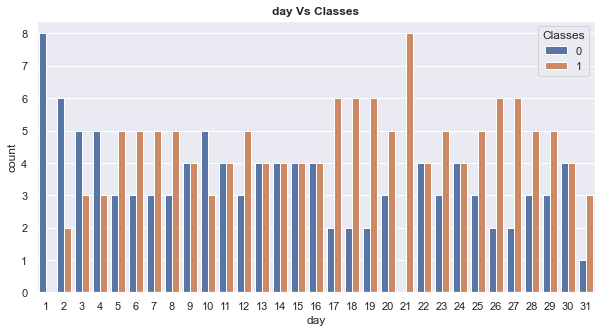

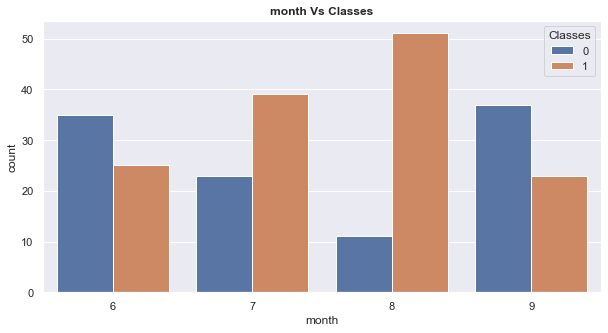

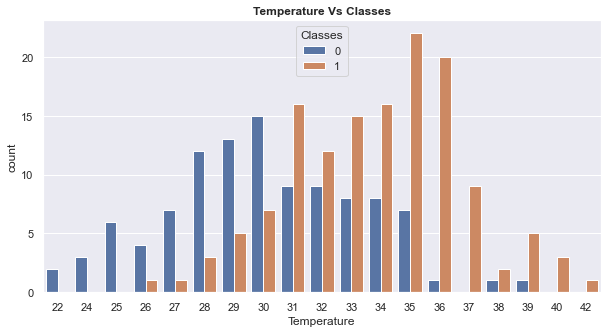

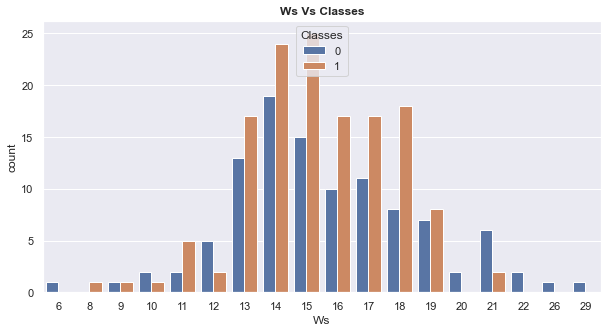

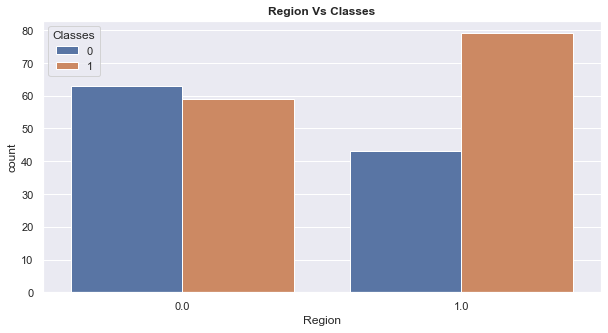

In [27]:
### this is bivariate analysis between target feature classes and discrete numerical features
### for this we plot count plot
for feature in discrete_features:
    sns.set(rc={'figure.figsize':(10,5)})
    sns.countplot(data=dataset, x=feature, hue='Classes')
    plt.title("{} Vs Classes".format(feature),fontweight="bold")
    plt.show();

### <span style='color:blue'>Observation</span> 
1. From day vs Classes plot it is visible that on almost all days the occurance of fire is there, and its count is more than or equal to the count of no fire cases.
2. From month vs Classes plot it is visible that july and august month have more cases of occurance of fire as compared to other  two months of june and september where occurance of fire is less as compared to no fire. 
3. The month of august has highest no of cases of occurance of fire.
4. Overall cases of occurance of fire is more than the cases of no occurance of fire.
5. From temperature vs Classes plot it is visible that temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.
6. From windspeed vs Classes plot it is visible that for wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.
7. From Region vs Class plot it is visible that in Bejaia region, the no of cases of occurance of fire is less compared to no fire.
8. In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

9. Most no of fires occured on 21st of the month.
10. Least no of fires occured on 2nd of the month.
11. For most days either fire occured was greater than or equal to no fire occured.

12. Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.
13. July and august have more cases of fire as compared to no fire.
14. June and september have more cases of no fire as compared to fire.

15. In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.
16. In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire. 
17. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

### <span style='color:red '>3.4.0 Continuous Numerical Features</span> 

In [28]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


### <span style='color:red '>3.4.1 Distribution of Continuous Numerical Features</span> 

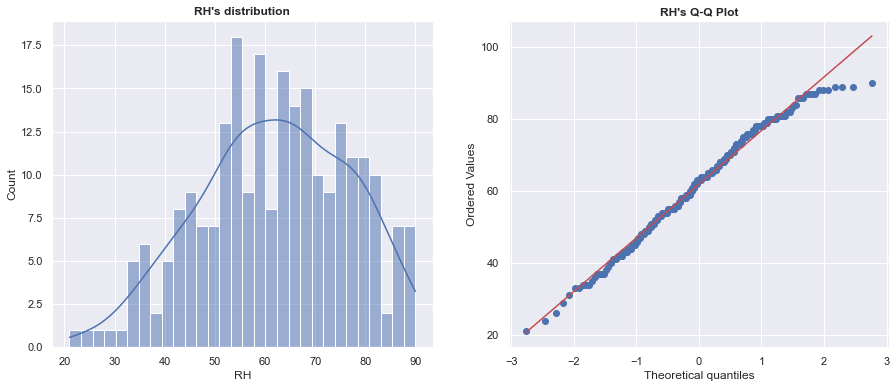

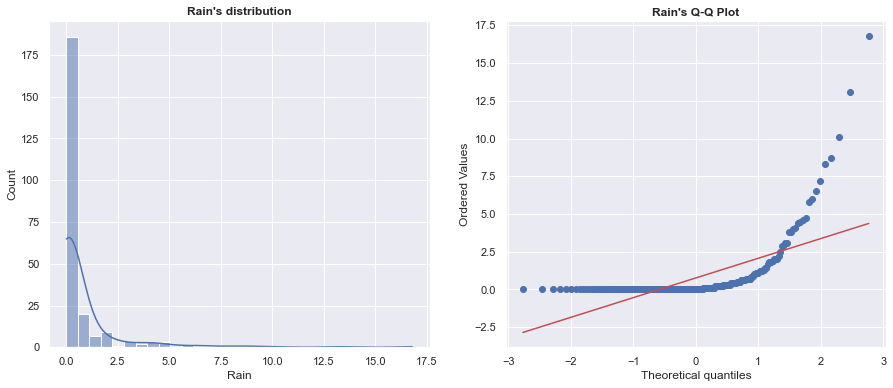

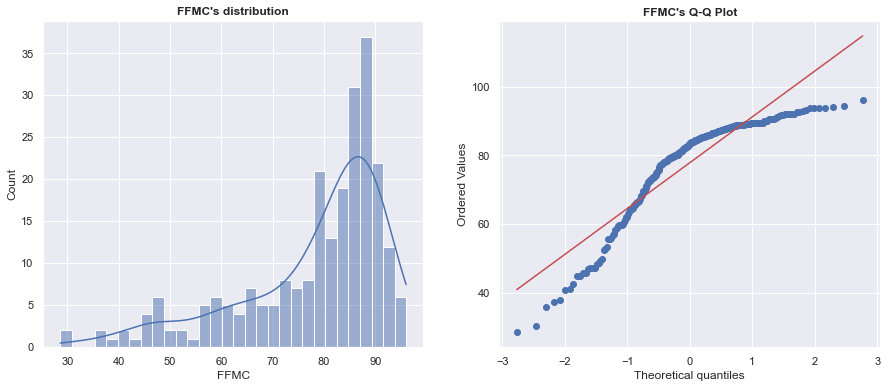

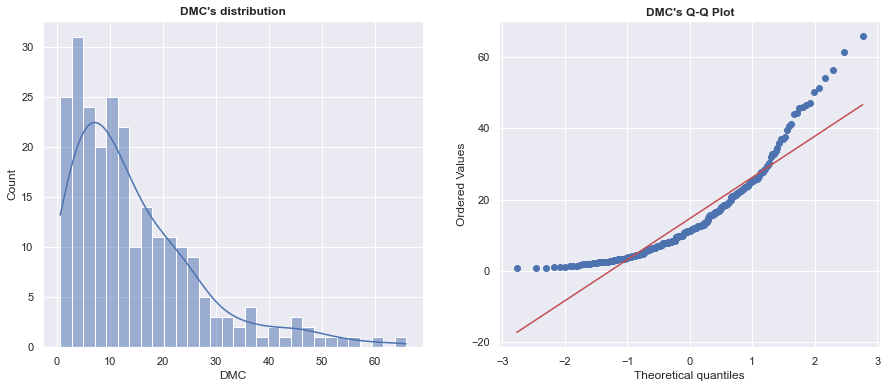

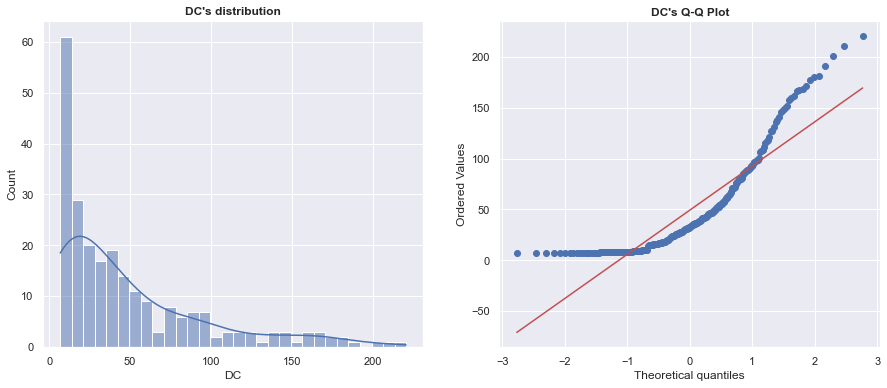

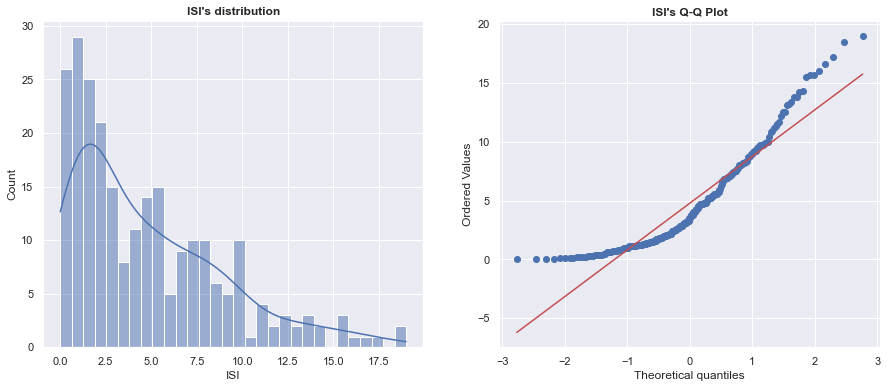

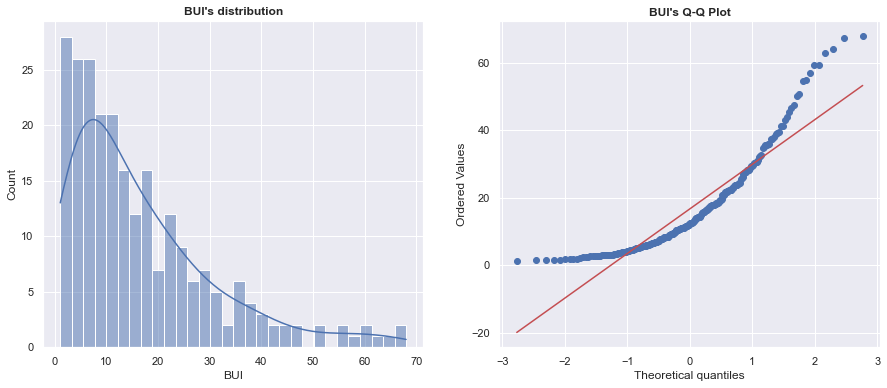

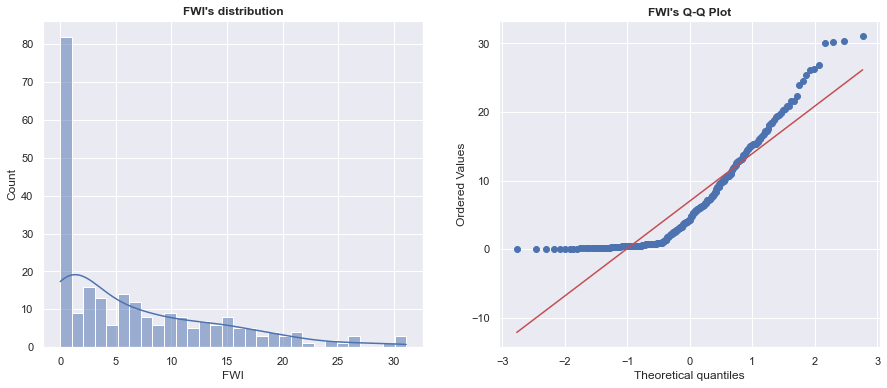

In [29]:
### Checking distribution of Continuous numerical features

for i in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=dataset, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)
    stats.probplot(dataset[i], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")

### <span style='color:blue'>Observation</span> 
1. Relative humidity is following gaussian distribution.
2. Rain, DMC, DC, ISI, BUI, FWI are following right skewed distribution(Log-Normal distribution).
3. FFMC feature follows left skwed distribution.

### <span style='color:red '>3.4.2 Comparing Continuous Numerical Features with Region</span> 

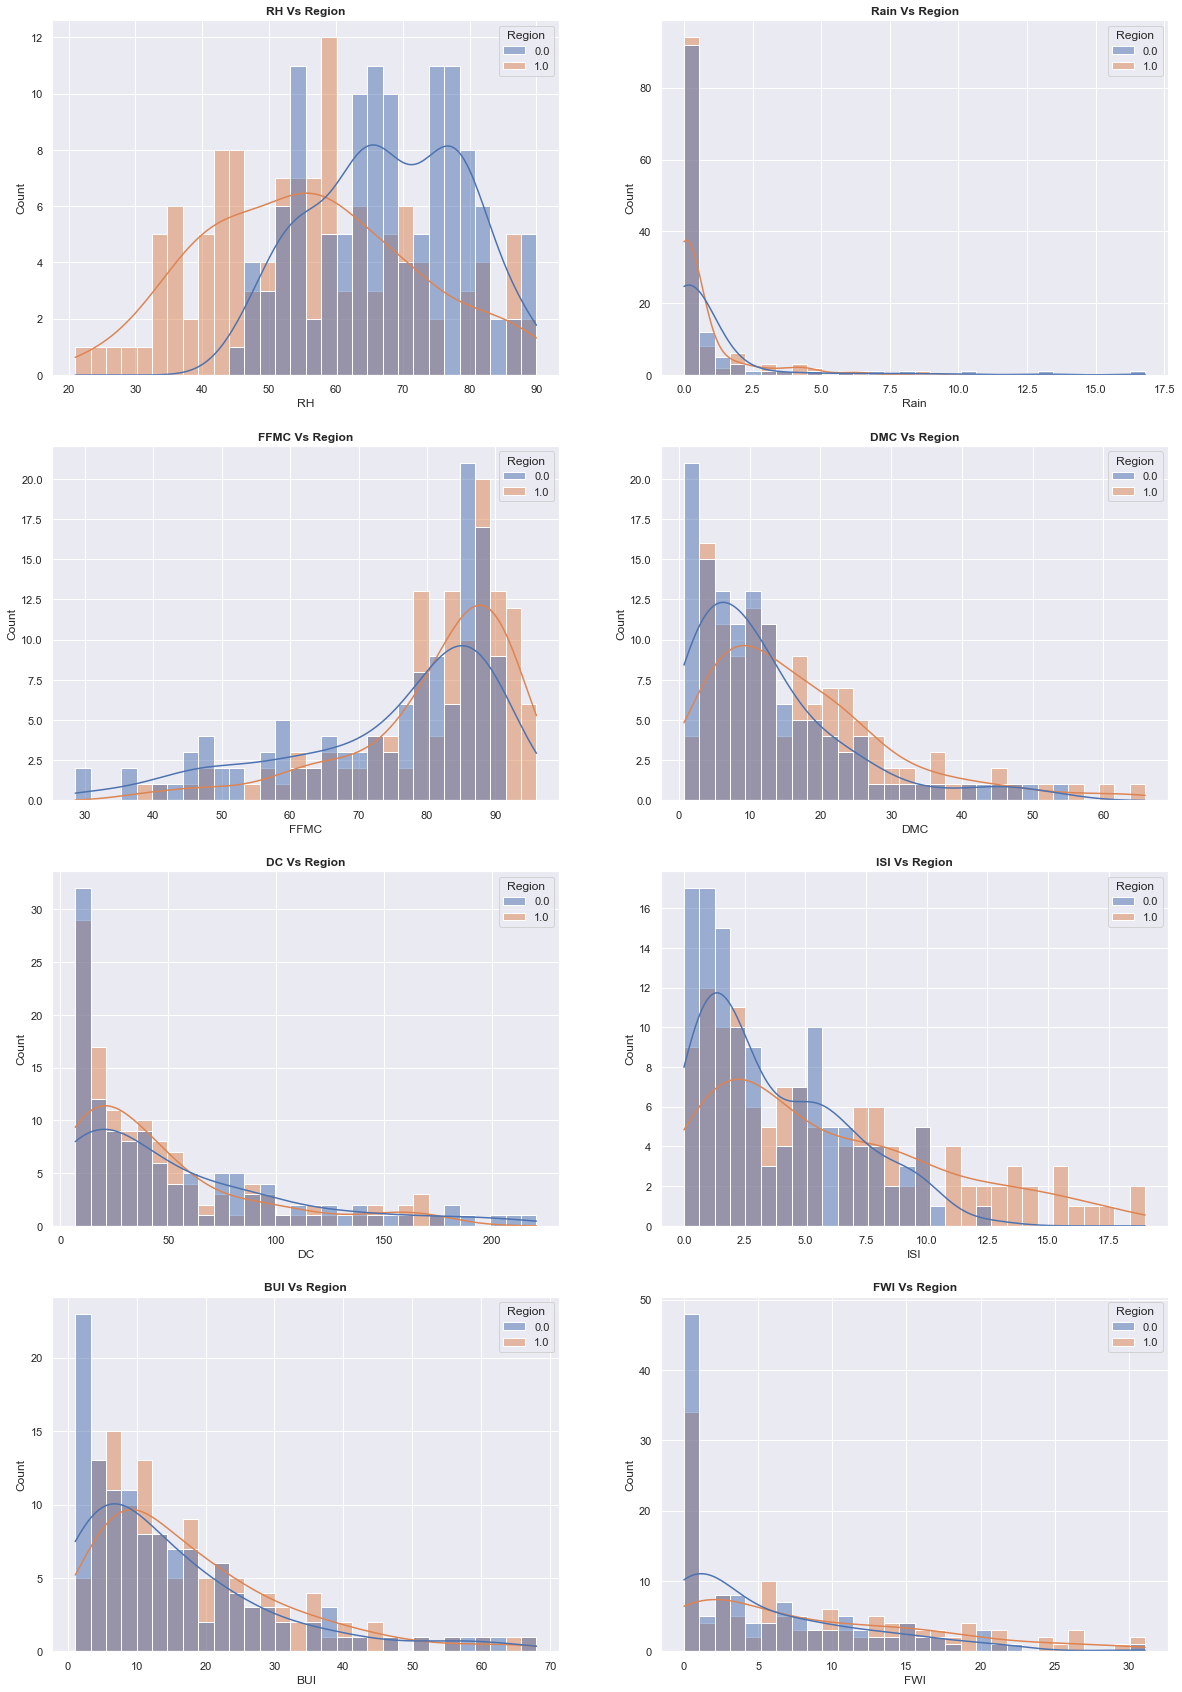

In [30]:
### Comparing Continuous numerical features with Region 

plt.figure(figsize=(20,30))
for i in enumerate(continuous_features):
    plt.subplot(4, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.histplot(data=dataset, x=i[1], kde=True, bins=30, color='blue', hue='Region')
    plt.title("{} Vs Region".format(i[1]),fontweight="bold")

### <span style='color:red '>3.4.3 Comparing Continuous numerical features with Classes</span> 

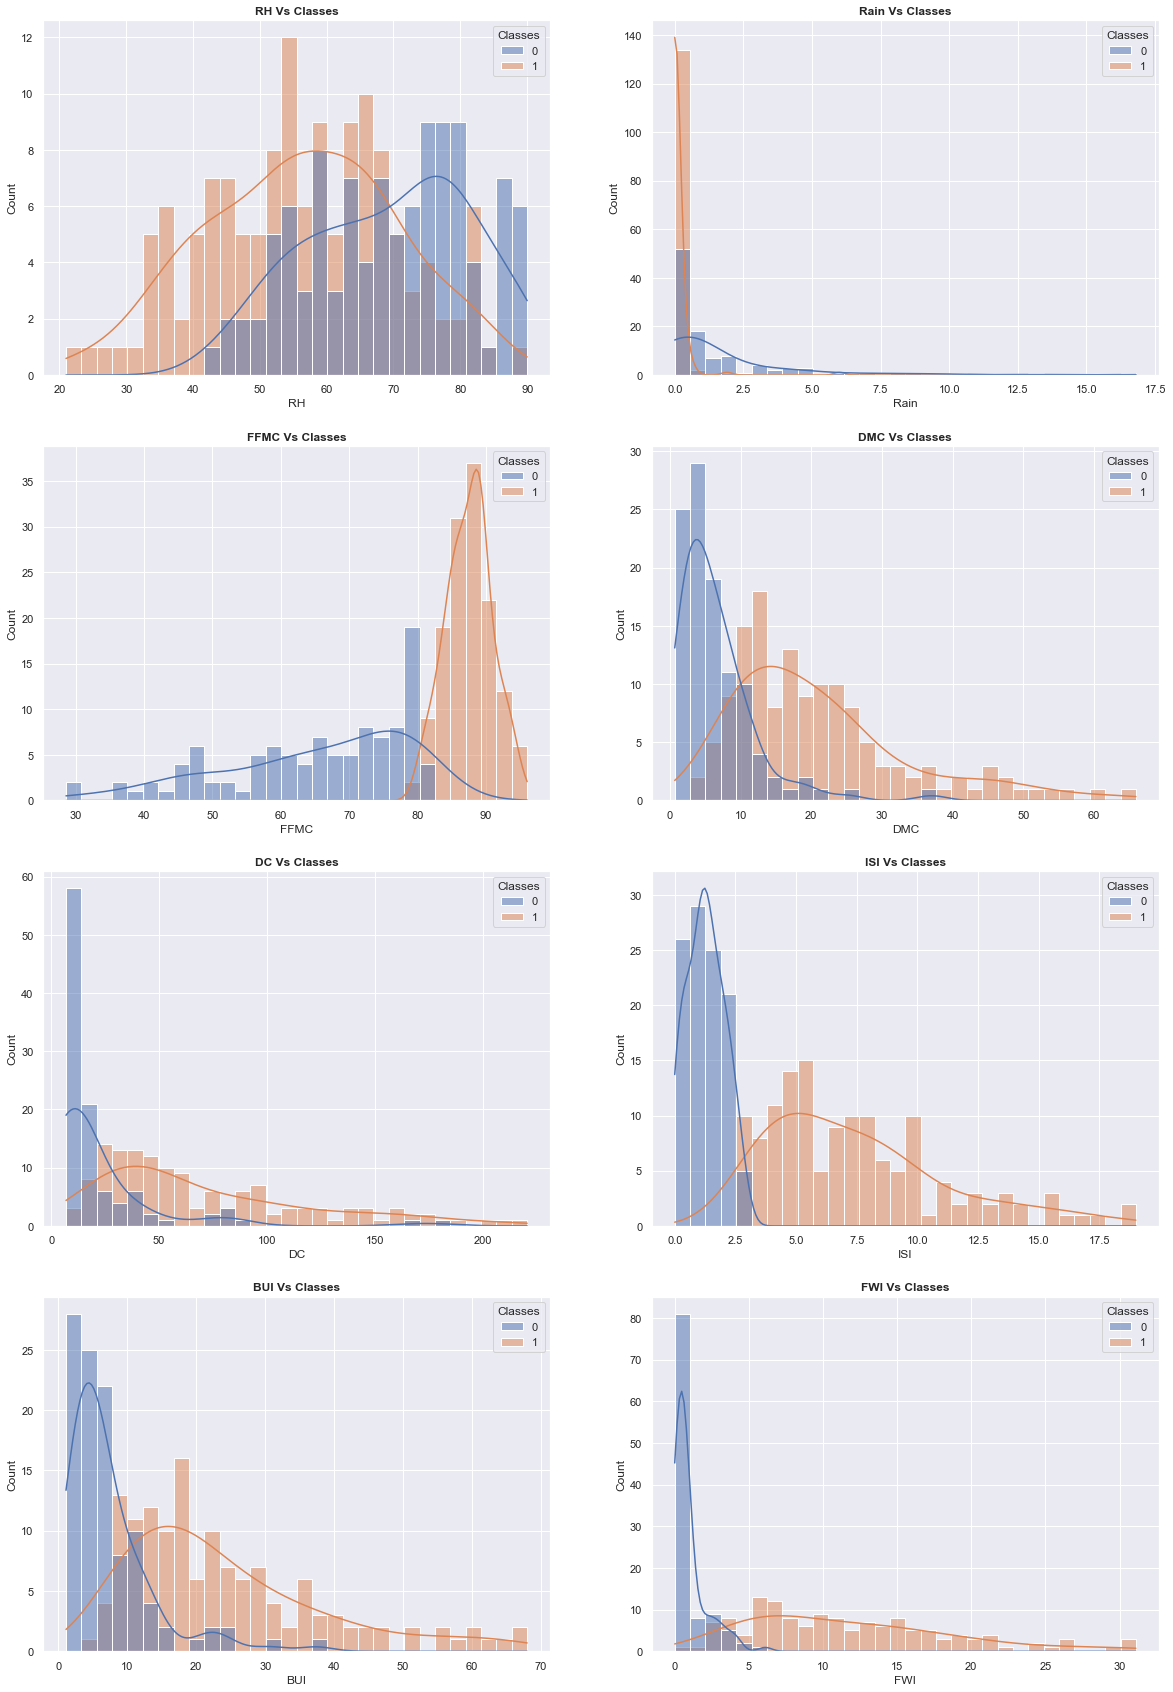

In [31]:
### Comparing Continuous numerical features with Classes

plt.figure(figsize=(20,30))
for i in enumerate(continuous_features):
    plt.subplot(4, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.histplot(data=dataset, x=i[1], kde=True, bins=30, color='blue', hue='Classes')
    plt.title("{} Vs Classes".format(i[1]),fontweight="bold")

### <span style='color:red '>3.5 Checking Outliers</span> 

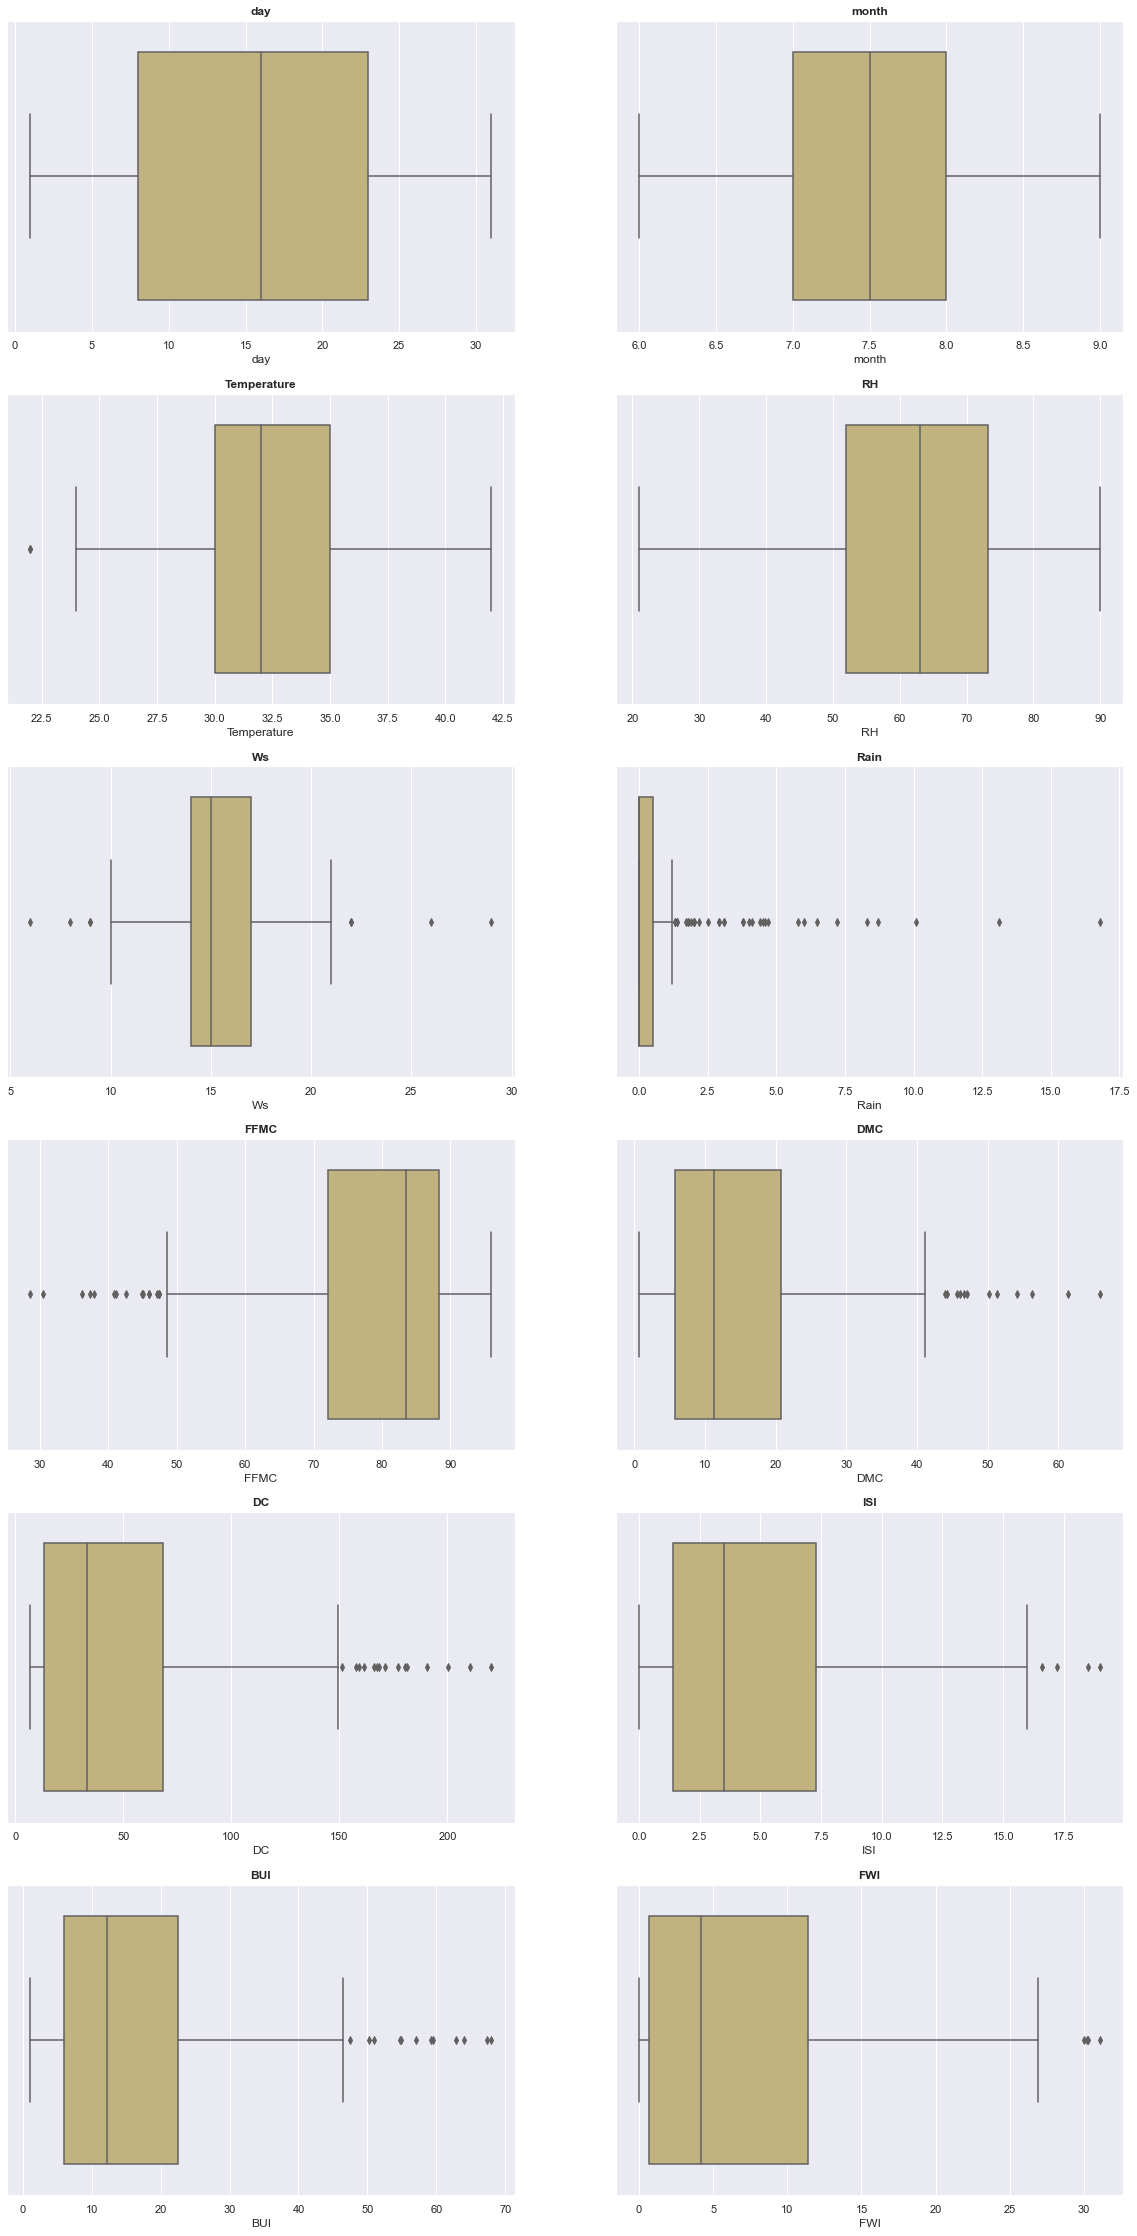

In [32]:
### Checking outliers in numerical features

plt.figure(figsize=(20,40))
for i in enumerate(numerical_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.boxplot(data=dataset, x=i[1], color='y')
    plt.title("{}".format(i[1]), fontweight="bold")

### <span style='color:blue'>Observation</span> 
1. Relative Humidity, RH feature doesnt have outliers.
2. Temperature and FFMC have outliers in lower boundary side.
3. Wind Speed, Ws has outliers on both sides(Upper and lower boundary).
4. Rain, DMC,DC, ISI, BUI and FWI have outilers in upper boundary side.

## <span style='color:red '>4.0 Correlation between each Numerical features</span> 

In [196]:
corr= round(dataset[numerical_features+['Classes']].corr(),2)
corr

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.00,0.00,0.10,-0.07,0.05,-0.11,0.22,0.49,0.53,0.18,0.52,0.35,0.20
month,0.00,1.00,-0.06,-0.04,-0.04,0.04,0.02,0.07,0.13,0.06,0.09,0.08,0.02
Temperature,0.10,-0.06,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56,0.52
RH,-0.07,-0.04,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57,-0.44
Ws,0.05,-0.04,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03,-0.07
Rain,-0.11,0.04,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38
FFMC,0.22,0.02,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69,0.77
DMC,0.49,0.07,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87,0.58
DC,0.53,0.13,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74,0.51
ISI,0.18,0.06,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91,0.74


### <span style='color:red '>4.1 Heatmap to visualise the Correlation</span> 

<AxesSubplot:>

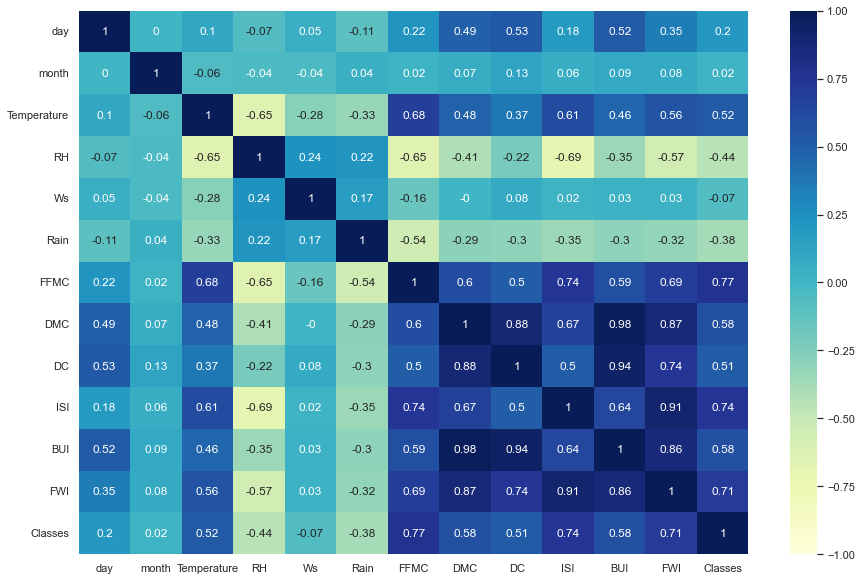

In [197]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr, annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

### <span style='color:blue'>Note (For both positive and negative side)</span> 
1. Correlation coefficients between 0.9 and 1.0,  very highly correlated. 
2. Correlation coefficients between 0.7 and 0.9,  highly correlated. 
3. Correlation coefficients between 0.5 and 0.7,  moderately correlated. 
4. Correlation coefficients between 0.3 and 0.5,  low correlation. 
5. Correlation coefficients less than 0.3, little  correlation

### <span style='color:blue'>Observations</span> 
1. Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
2. Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI

**Note:** Features with very hihg and high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, we can drop one of the two features.

### <span style='color:red '>4.2 Relationship between Numerical Feature and Target Feature</span> 

### <span style='color:red '>4.2.1 Strip Plot</span> 

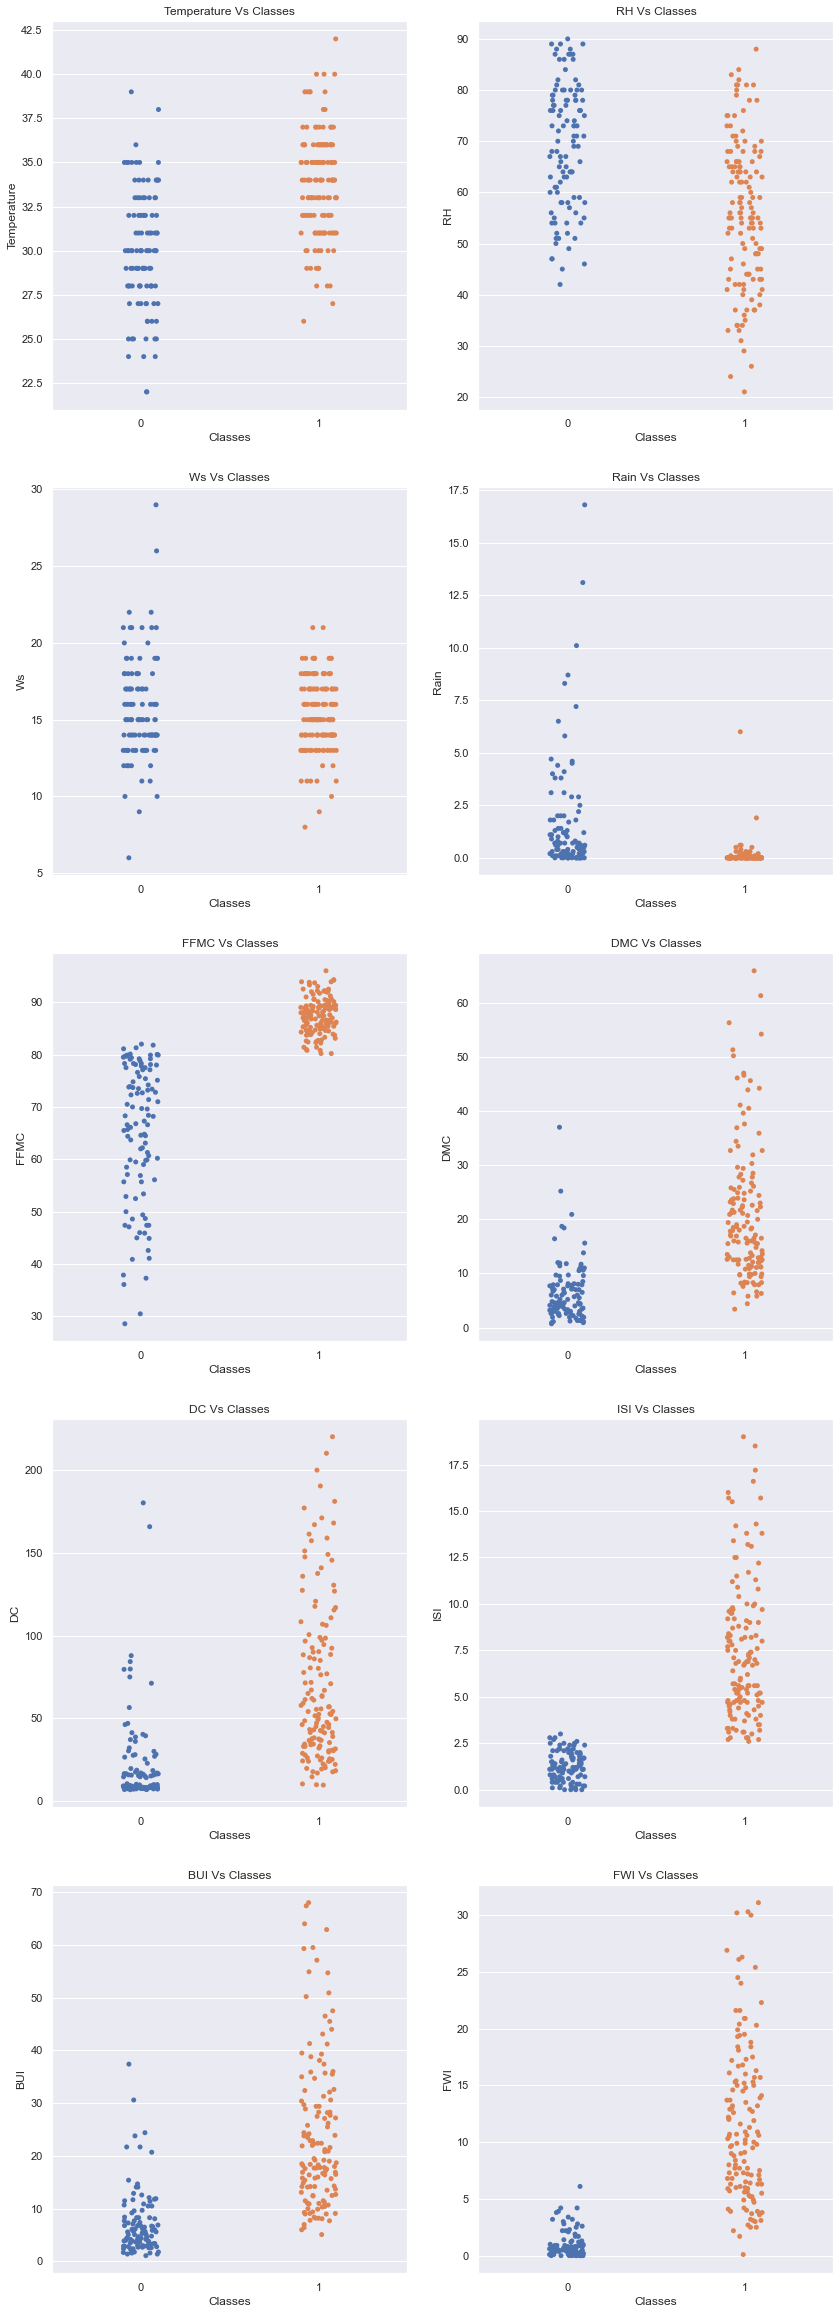

In [35]:
num_feature_custom=[feature for feature in numerical_features if feature not in ['day', 'month']]

plt.figure(figsize=(14,50))
for i in enumerate(num_feature_custom):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,8)})
    sns.stripplot(data=dataset, y=i[1], x='Classes')
    plt.title("{} Vs Classes".format(i[1]))

### <span style='color:blue'>Observation</span> 
1. It is visible that for temperature between 30 to 37, there is most no of cases of occurance of fire, i.e Hot regions are more prone to forrest fires.
2. For RH 40 to 70 and wind speed between 13 to 19 Km/h, Most no of cases of occurance of fire is reported, i.e dry regions are more prone to forrest fires.
3. Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.
4. For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.
5. DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.


### <span style='color:red '>4.2.2 Regplot Plot</span> 

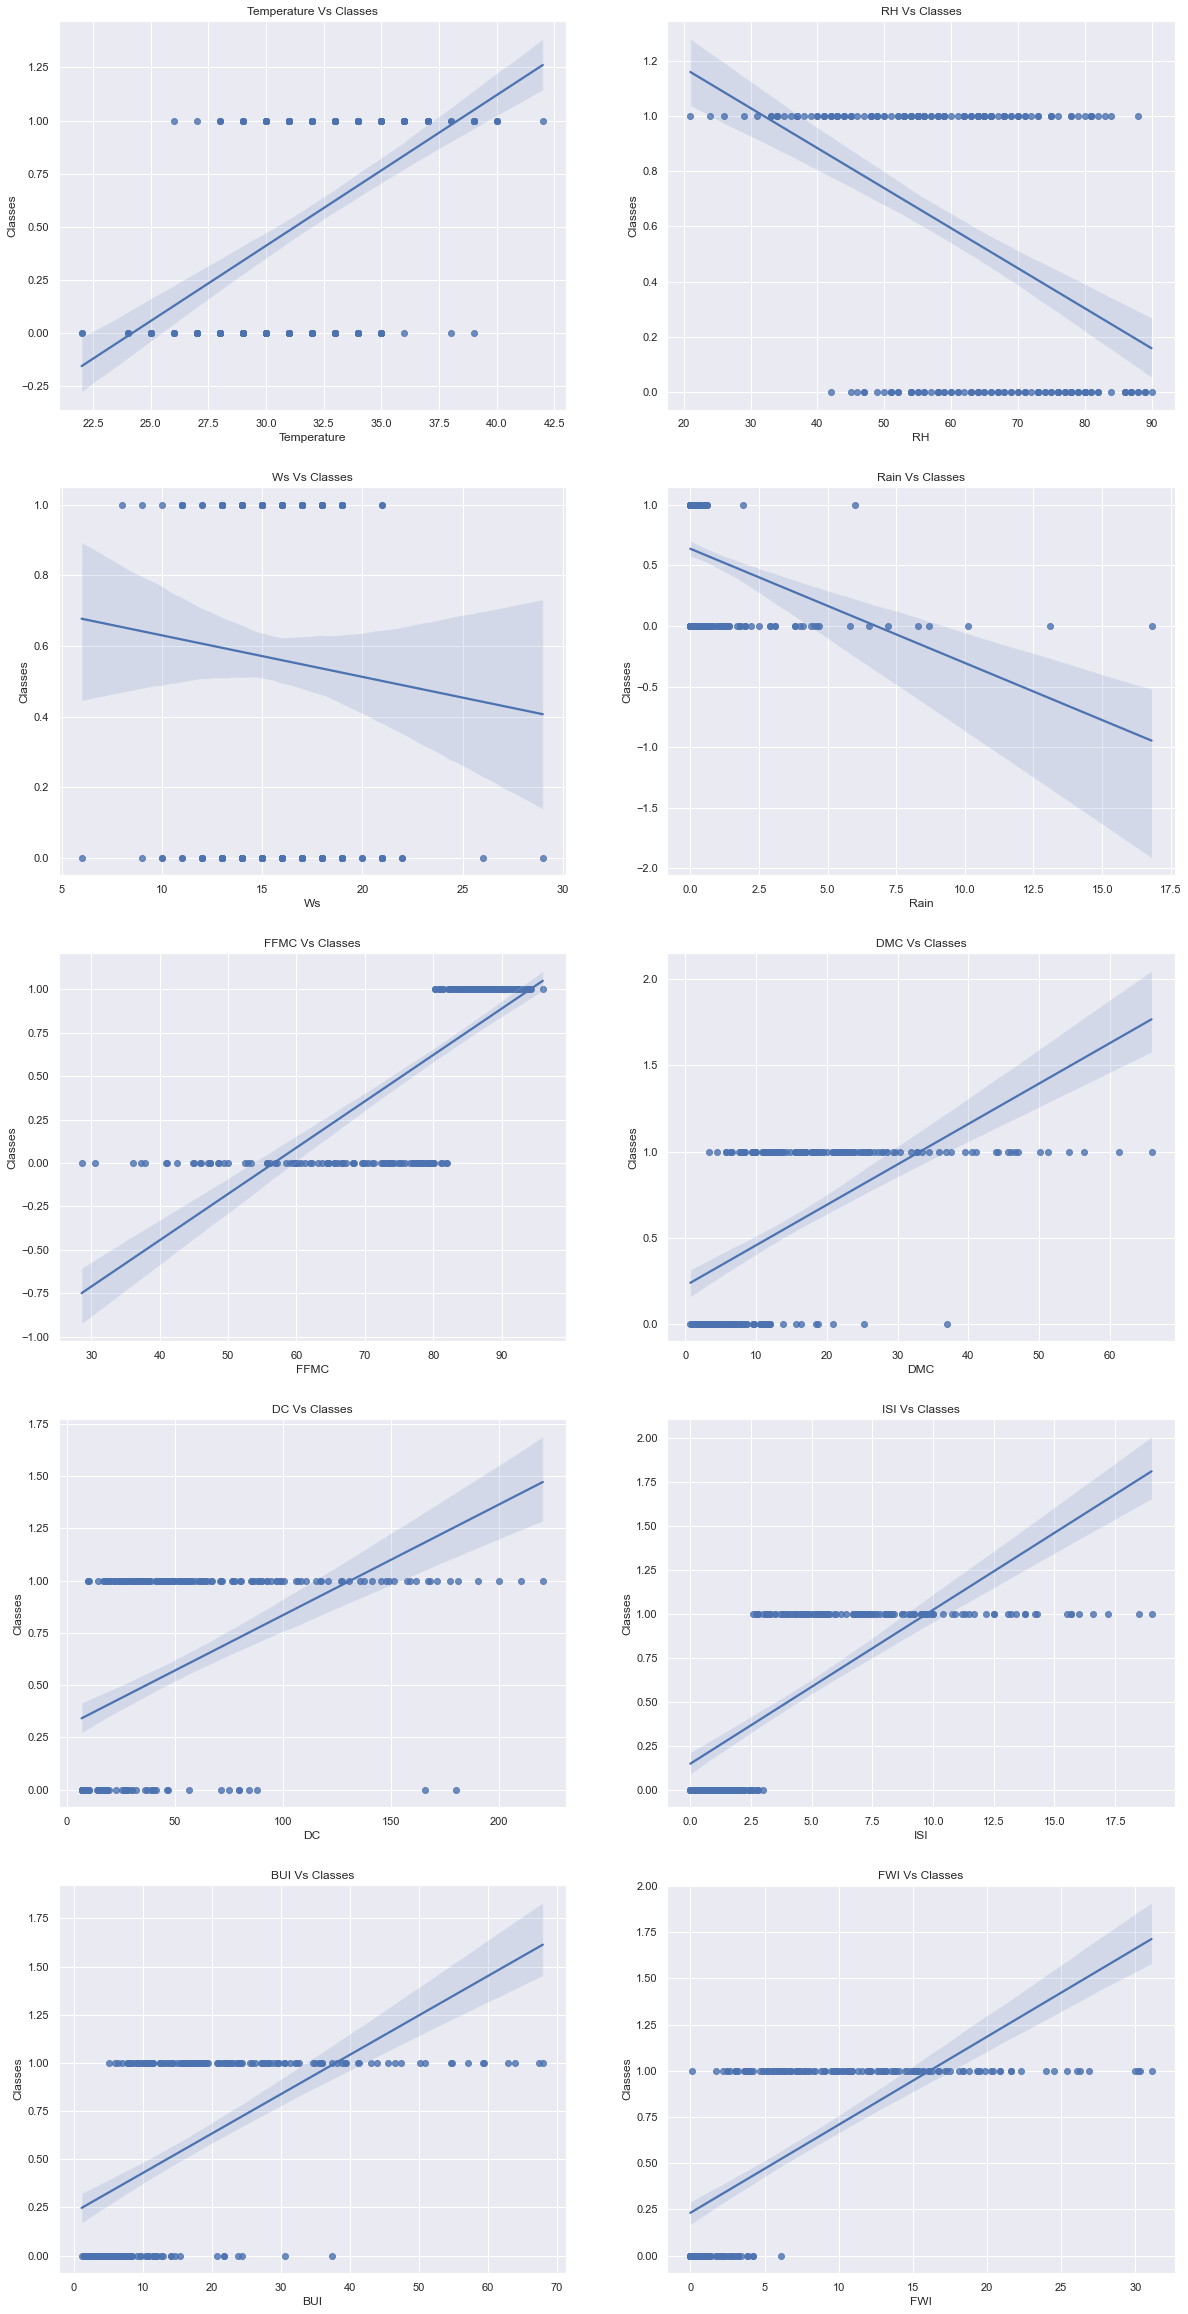

In [36]:
plt.figure(figsize=(20,50))
for i in enumerate(num_feature_custom):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=dataset, x=i[1], y='Classes')
    plt.xlabel(i[1])
    plt.ylabel("Classes")
    plt.title("{} Vs Classes".format(i[1]))

### <span style='color:blue'>Final Report</span> 
1. Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
2. Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
3. Temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.
4. Wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.
5. Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.
6. For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.
7. DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.
8. In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.
9. In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire. 
10. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.
11. Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.
12. July and august have more cases of fire as compared to no fire.
13. June and september have more cases of no fire as compared to fire.
14. Relative Humidity, RH feature doesnt have outliers whereas Temperature, FFMC, wind speed, Rain, DMC,DC, ISI, BUI and FWI have outilers.
15. There is no null vales in dataset.

## <span style='color:red'>5.0  Model Building</span>

### <span style='color:red'>5.1 Getting independent features in dataset(X) and dependent feature in series(y)</span>

In [37]:
### Creating copy of dataset
data=dataset.copy()

In [38]:
data['Class']=data['Classes']

In [39]:
data.drop('Classes', axis=1, inplace=True)

In [40]:
data['Classes']=data['Class']
data.drop('Class', axis=1, inplace=True)

In [41]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0


In [42]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

### <span style='color:red '>5.2 Splitting data into Training and Test data</span>

In [44]:
### random state train test split will be same with all people using random_state=16

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

X_train.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
216,3,9,28,75,16,0.0,82.2,4.4,24.3,3.3,6.0,2.5,1.0
199,17,8,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,1.0
156,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
175,24,7,33,63,17,1.1,72.8,20.9,56.6,1.6,21.7,2.5,1.0
228,15,9,32,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1.0


In [45]:
y_train.head()

216    1
199    1
156    1
175    0
228    1
Name: Classes, dtype: int64

In [46]:
X_test.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
72,12,8,35,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,0.0
149,28,6,37,37,13,0.0,92.5,27.2,52.4,11.7,27.1,18.4,1.0
29,30,6,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,0.0
191,9,8,39,43,12,0.0,91.7,16.5,30.9,9.6,16.4,12.7,1.0
10,11,6,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,0.0


In [47]:
y_test.head()

72     0
149    1
29     1
191    1
10     1
Name: Classes, dtype: int64

In [48]:
### both will have same shape
X_train.shape, y_train.shape

((170, 13), (170,))

In [49]:
### both will have same shape
X_test.shape, y_test.shape

((74, 13), (74,))

### <span style='color:red '>5.3 Standardisation/ Feature scaling the dataset</span>

In [50]:
### Creating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [51]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[-1.46667507,  1.32918909, -1.20880747, ..., -0.74565569,
        -0.62033172,  0.95399809],
       [ 0.12870275,  0.44306303,  2.71075899, ...,  0.96241799,
         2.25514379,  0.95399809],
       [-1.23876395, -0.44306303,  0.47100673, ...,  0.14338266,
         1.05145637,  0.95399809],
       ...,
       [ 1.610125  ,  1.32918909, -2.04871457, ..., -0.99766657,
        -0.94131503, -1.04822013],
       [ 1.04034721,  1.32918909, -1.20880747, ..., -0.17863123,
        -0.5534602 ,  0.95399809],
       [ 0.24265831, -0.44306303,  0.19103769, ...,  0.50739836,
         0.26237239,  0.95399809]])

In [52]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test

array([[-4.41075042e-01,  4.43063032e-01,  7.50975758e-01,
        -7.32557183e-01, -9.32937185e-01, -2.16223446e-01,
         2.27131581e-01,  6.22267177e-02,  5.59740154e-01,
        -5.58457335e-01,  2.83388695e-01, -3.92968541e-01,
        -1.04822013e+00],
       [ 1.38221389e+00, -1.32918909e+00,  1.31091382e+00,
        -1.64681313e+00, -9.32937185e-01, -3.58512423e-01,
         9.91597781e-01,  1.00182157e+00,  8.34900180e-02,
         1.54517290e+00,  7.31408021e-01,  1.50618273e+00,
         9.53998092e-01],
       [ 1.61012500e+00, -1.32918909e+00,  1.91037693e-01,
        -7.97861179e-01, -5.60638308e-01, -3.58512423e-01,
         7.32225321e-01,  6.53523476e-01,  9.31089379e-01,
         5.16223326e-01,  8.15411645e-01,  7.70595968e-01,
        -1.04822013e+00],
       [-7.82941717e-01,  4.43063032e-01,  1.87085189e+00,
        -1.25498915e+00, -1.30523606e+00, -3.58512423e-01,
         9.36993053e-01,  1.35126318e-01, -3.67583899e-01,
         1.06499643e+00, -1.76242897e

## <span style='color:red '>6.0 Model</span>
### <span style='color:red '>1.0 Logistic Regression</span>

In [140]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression()
logistic_reg

LogisticRegression()

In [141]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression()

### <span style='color:red '>1.1 Using Above Model to get prediction for test data</span>

In [142]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

### <span style='color:red '>1.2.0 Performance Metrics</span>

### <span style='color:red '>1.2.1 Confusion Matrix</span>

In [143]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[34,  2],
       [ 1, 37]], dtype=int64)

In [144]:
truly_positive=confusion_mat[0][0]
falsely_positive=confusion_mat[0][1]
falsely_negative=confusion_mat[1][0]
truly_negative=confusion_mat[1][1]

### <span style='color:red '>1.2.2 Accuracy Score</span>

In [145]:
### accuracy using accuracy_score
accuracy=round(accuracy_score(y_test, logistic_reg_pred),4)
accuracy

0.9595

In [146]:
### manual calcualtion for accuracy
accuracy_manual=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual))

Accuracy of our model is 0.9595


### <span style='color:red '>1.2.3 Precision Score</span>

In [147]:
precision_manual=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual))

Precision of our model is 0.9444


### <span style='color:red '>1.2.4 Recall Score</span>

In [148]:
recall_manual=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall_manual))

Recall of our model is 0.9714


### <span style='color:red '>1.2.5 F-1 Score</span>

1. Giving equal importance to falsely positive and falsely negative

In [149]:
f1_score=2*(precision_manual*recall_manual)/(precision_manual+recall_manual)
print("F-1 Score of our model is {} ".format(round(f1_score,4)))

F-1 Score of our model is 0.9577 


### <span style='color:red '>1.2.6 Classification Report</span>

In [150]:
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.95      0.97      0.96        38

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



## <span style='color:red '>7.0 Saving the Model</span>

In [151]:
### Writing model to a file that will be used while deployment
with open('model_Logistic_regression_algerian_ff.sav','wb') as f:
    pickle.dump(logistic_reg,f)

## <span style='color:red '>8.0 Creating Imbalance in dataset</span>

In [65]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0


In [66]:
data.shape

(244, 14)

In [67]:
### Creating imbalance
### 1. splitting data in 90:10 percent ratio using train test split
X1=data.iloc[:,:-1]
y1=data.iloc[:,-1]

In [68]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1, y1, test_size=0.10, random_state=17)

In [69]:
### both will have same shape
X_train_imb.shape, y_train_imb.shape

((219, 13), (219,))

In [70]:
### both will have same shape
X_test_imb.shape, y_test_imb.shape

((25, 13), (25,))

In [71]:
### Replacing all values as 1 in y_train and all values as zero in y_test to create imbalance 

y_train_imb=y_train_imb.replace(0,1)

In [72]:
y_train_imb.head()

156    1
183    1
11     1
75     1
130    1
Name: Classes, dtype: int64

In [73]:
y_test_imb=y_test_imb.replace(1,0)
y_test_imb.head()

48     0
216    0
101    0
38     0
86     0
Name: Classes, dtype: int64

In [74]:
X_train_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
156,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
183,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0
11,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0
75,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0
130,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0


In [75]:
### Combining X_train_imb and y_train_imb
train_imb=X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
156,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1
183,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1
11,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1
75,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1
130,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1


In [76]:
### Combining X_test_imb and y_test_imb
test_imb=X_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
48,19,7,35,59,17,0.0,88.1,12.0,52.8,7.7,18.2,10.9,0.0,0
216,3,9,28,75,16,0.0,82.2,4.4,24.3,3.3,6.0,2.5,1.0,0
101,10,9,33,73,12,1.8,59.9,2.2,8.9,0.7,2.7,0.3,0.0,0
38,9,7,32,68,14,1.4,66.6,7.7,9.2,1.1,7.4,0.6,0.0,0
86,26,8,31,78,18,0.0,85.8,45.6,190.6,4.7,57.1,13.7,0.0,0


In [77]:
### Checking shape of imbalance dataset
train_imb.shape, test_imb.shape

((219, 14), (25, 14))

In [78]:
### Combining train_imb dataset and test_imb dataset into data_imb dataset 
data_imb=pd.concat([train_imb, test_imb], ignore_index=True, sort=False)

In [79]:
data_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1
1,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1
2,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1
3,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1
4,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1


In [80]:
data_imb.shape

(244, 14)

In [81]:
### there is imbalence in our dataset
data_imb.Classes.value_counts()

1    219
0     25
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

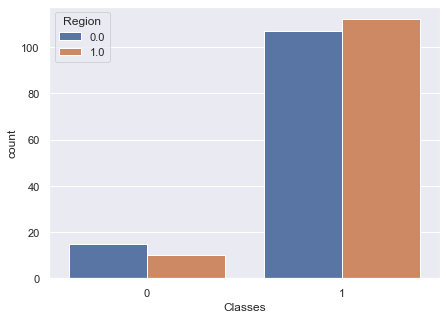

In [168]:
### 0 is not fire and 1 i fire for Classes
### 0 is Bejaia region and 1 is Sidi Bel-abbes region 
plt.figure(figsize=(7,5))
sns.countplot(data=data_imb, x='Classes', hue='Region')

## <span style='color:red '>9.0 Logistic Regression Model on Imbalence dataset</span>

### <span style='color:red '>9.1 Seperating Independent Features and Dependent Feature</span>

In [83]:
data_imb.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1
1,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1
2,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1
3,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1
4,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1


In [84]:
X1=data_imb.iloc[:,:-1]
y1=data_imb.iloc[:,-1]

In [85]:
X1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
1,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0
2,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0
3,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0
4,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0


In [86]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

### <span style='color:red '>9.2 Handling Imbalance dataset by Doing Upsampling</span>

In [89]:
### for upsampling 
from imblearn.combine import SMOTETomek

In [90]:
### Creating SMOTETomek object for over sampling
smk=SMOTETomek()
smk

SMOTETomek()

In [92]:
X_bal,y_bal=smk.fit_resample(X1,y1)

In [93]:
X_bal.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
1,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0
2,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0
3,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0
4,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0


In [94]:
y_bal.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

In [98]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y1)))
print('Resampled dataset shape {}'.format(Counter(y_bal)))

Original dataset shape Counter({1: 219, 0: 25})
Resampled dataset shape Counter({1: 206, 0: 206})


In [99]:
### Now our dataset is balanced
X_bal.shape, y_bal.shape

((412, 13), (412,))

In [173]:
### Creating data_bal for basic EDA on dataset after balancing imbalanced dataset
data_bal=X_bal.join(pd.DataFrame(y_bal))
data_bal.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1
1,1,8,38,52,14,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1
2,12,6,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1
3,15,8,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1
4,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1


### <span style='color:red '>9.3 EDA on balanced dataset </span>

### <span style='color:red '>9.3.1 Discrete and Continuous features </span>

In [174]:
data_bal[data_bal.columns].nunique()

day             31
month            4
Temperature     19
RH              63
Ws              18
Rain           138
FFMC           350
DMC            339
DC             367
ISI            283
BUI            346
FWI            298
Region         102
Classes          2
dtype: int64

In [175]:
### Getting list of numerical features excluding Classes and Region
print(numerical_features)

['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


In [176]:
# here the assumption to consider a feature discrete is that it should have less than 35 unique values otherwise it will be 
# considered continuous feature
print(discrete_features)

['day', 'month', 'Temperature', 'Ws', 'Region']


### <span style='color:red '>9.3.2 Comparing Discrete features for Original and Balanced Dataset</span>

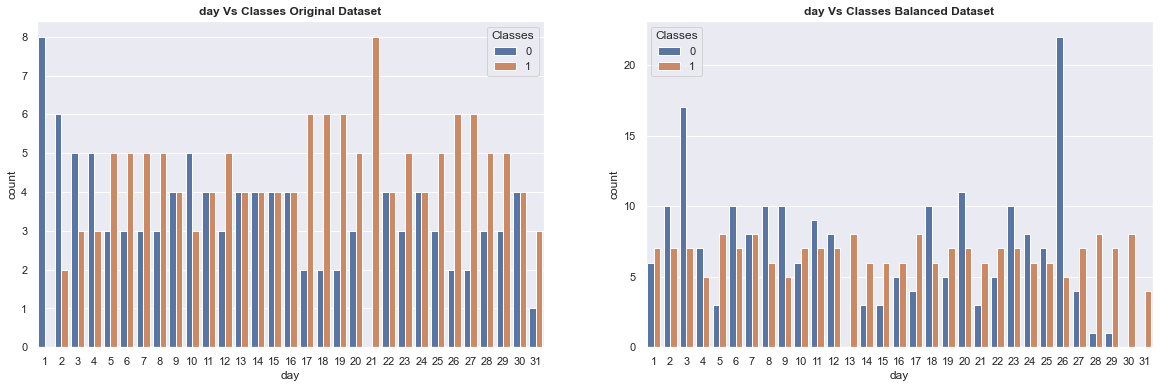

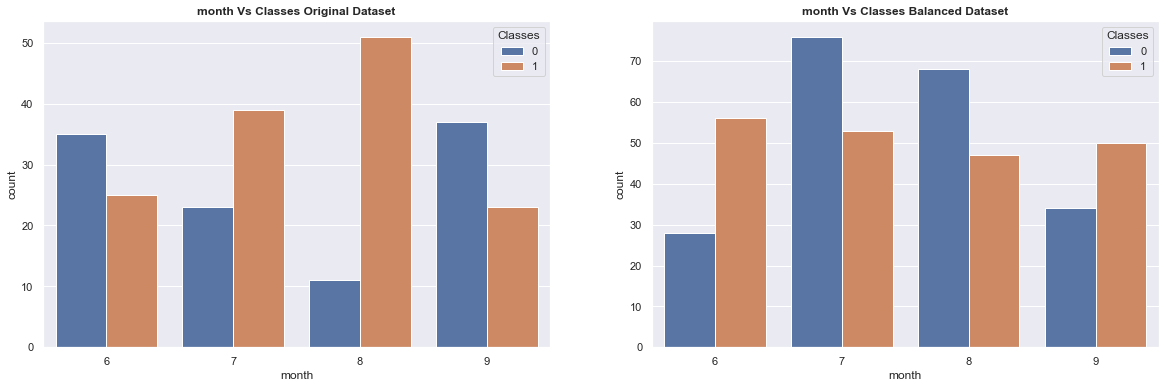

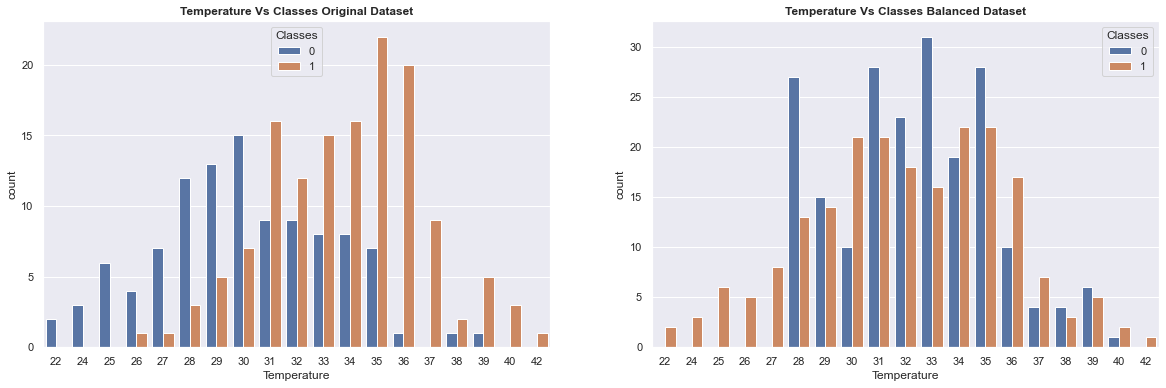

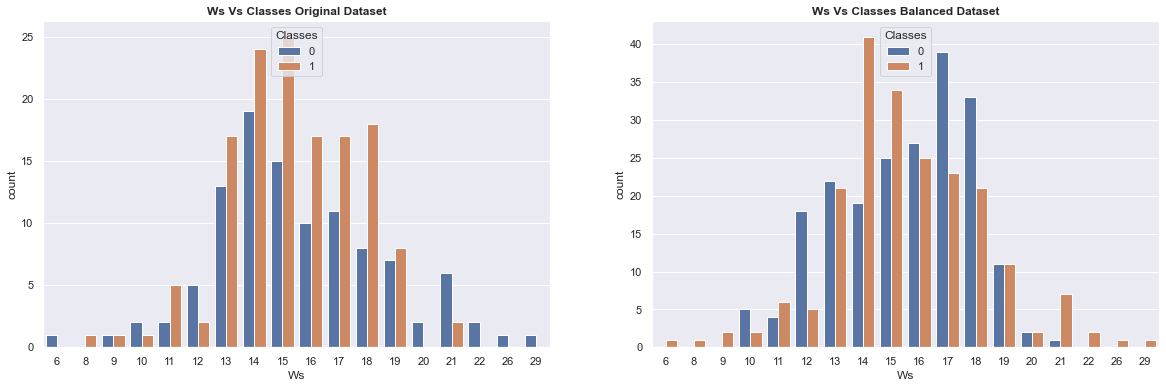

In [187]:
### this is bivariate analysis between target feature classes and discrete numerical features
### for this we plot count plot
count_feat=[feature for feature in discrete_features if feature not in ['Region']]

for feature in count_feat:
    plt.figure(figsize=(20,6))
    plt.subplot(121)
    sns.countplot(data=dataset, x=feature, hue='Classes')
    plt.title("{} Vs Classes Original Dataset".format(feature),fontweight="bold")
    
    plt.subplot(122)
    sns.countplot(data=data_bal, x=feature, hue='Classes')
    plt.title("{} Vs Classes Balanced Dataset".format(feature),fontweight="bold")

### <span style='color:blue'>Observations</span>

1. After balencing imbalance dataset there is more addition of cases of non fire records than fire records.
2. Original dataset had more fire cases daily than non fire cases, but it is reversed in balanced dataset.
3. Originally there were more No. of non fire cases in month of June and September, but now there are more fire cases in respective months.
4. Originally there were more No. of fire cases in month of July and August, but now there are more non fire cases in respective months.
5. Originally between temperature range of 30 to 37 degree celsius there were more fire cases, but now for the same temperature range there are more non fire cases.
6. For wind speed range og 16 to 18 Km/Hr in original dataset there were more cases of fire, but now for balanced dataset there are more non fire cases.

### <span style='color:red '>9.3.3 Comparing Distribution of Continuous features for Original and Balanced Dataset</span>

In [179]:
### Continuous Features
print(continuous_features)

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


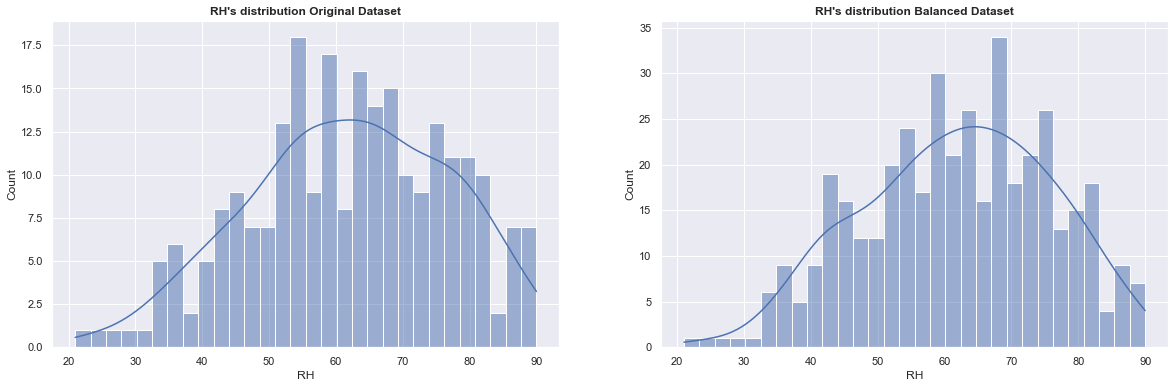

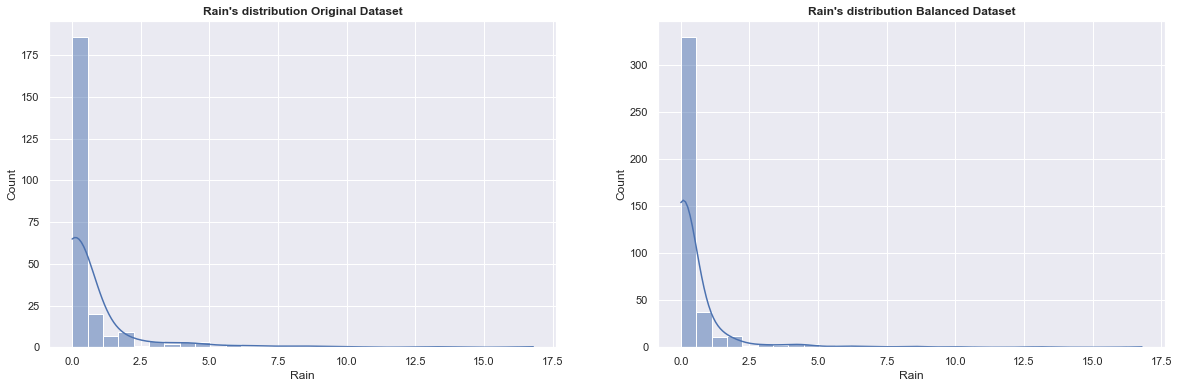

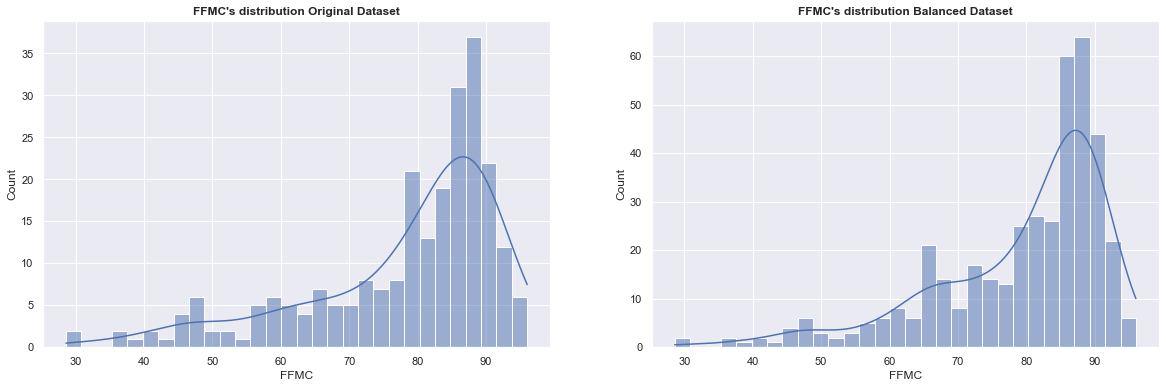

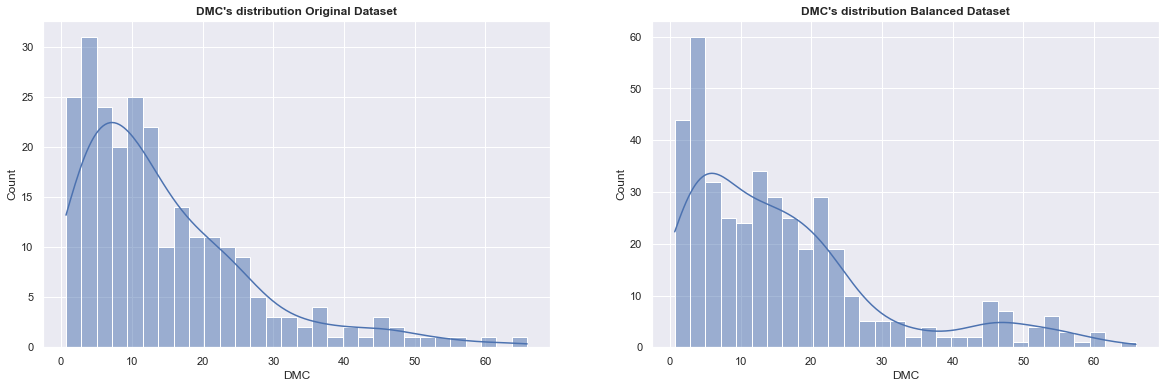

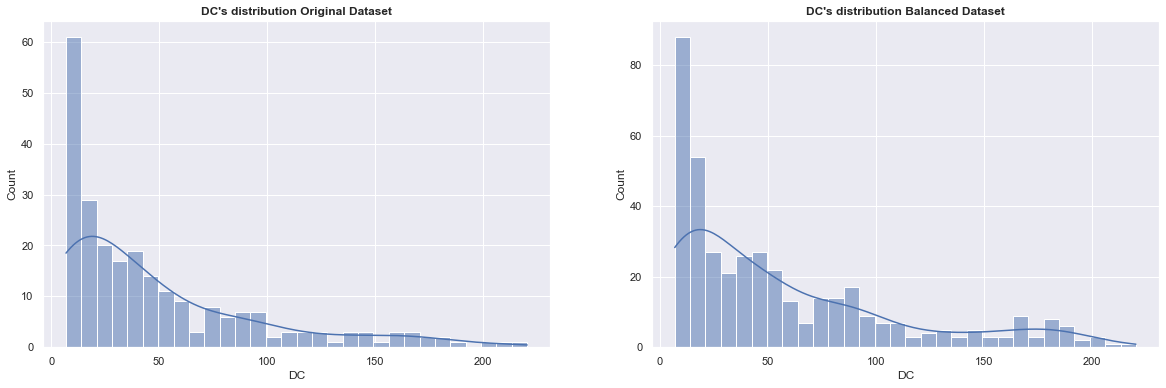

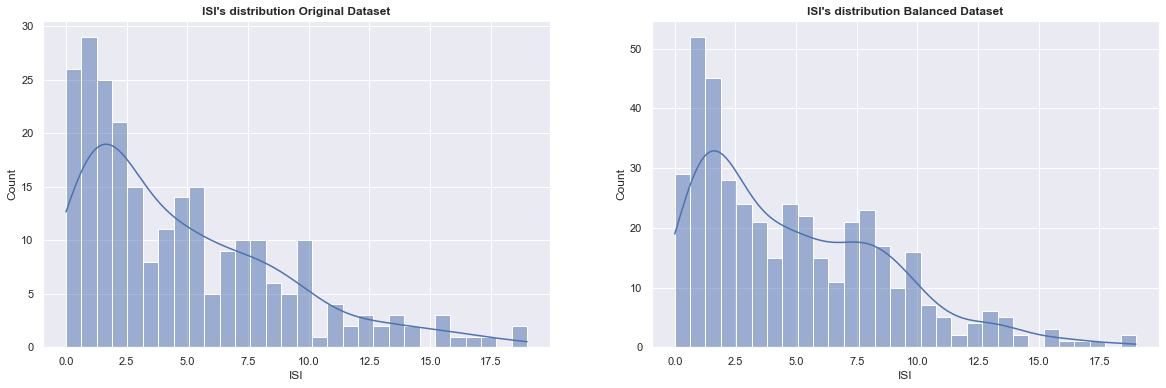

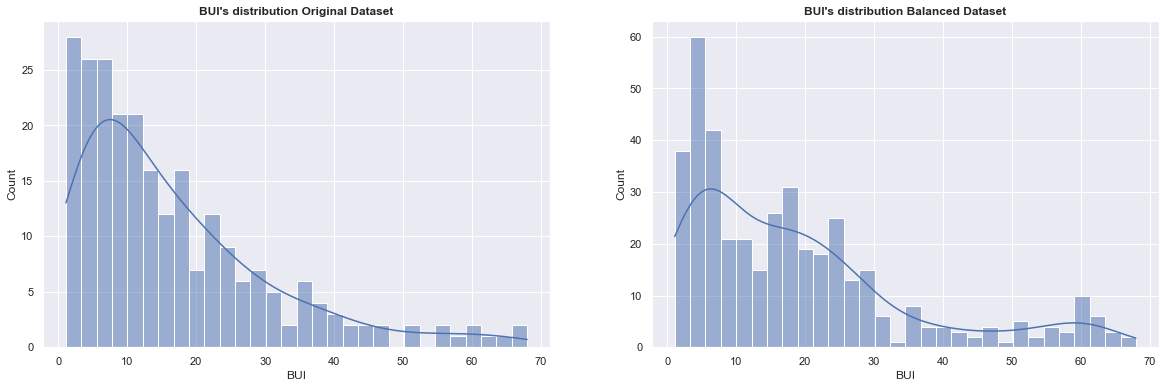

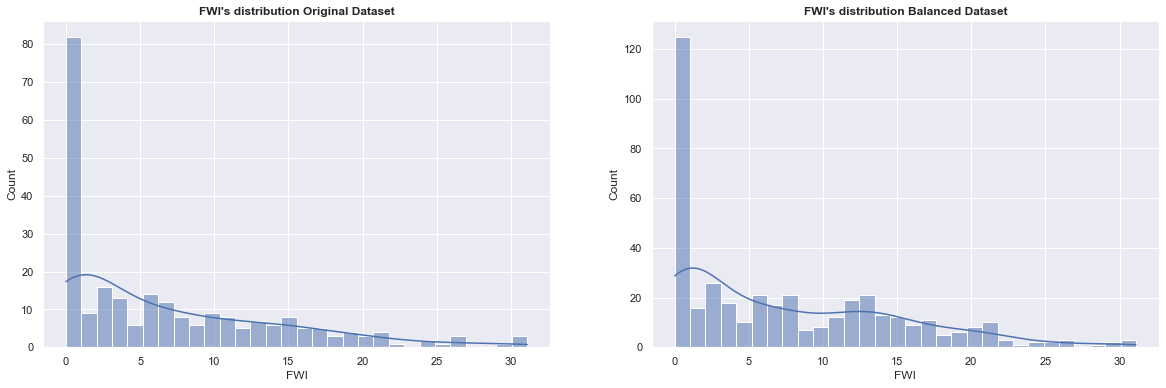

In [188]:
### Checking distribution of Continuous numerical features

for i in continuous_features:
    plt.figure(figsize=(20,6))
    plt.subplot(121)
    sns.histplot(data=dataset, x=i, kde=True, bins=30)
    plt.title("{}'s distribution Original Dataset".format(i),fontweight="bold")
    
    plt.subplot(122)
    sns.histplot(data=data_bal, x=i, kde=True, bins=30)
    plt.title("{}'s distribution Balanced Dataset".format(i),fontweight="bold")

### <span style='color:blue'>Observations</span>

1. All continuous features have similar distribution, the only difference is increase in count of observation in each feature with subtle change in distribution. 

### <span style='color:red '>9.3.4 Comparing Continuous features with Target feature for Original and Balanced Dataset</span>

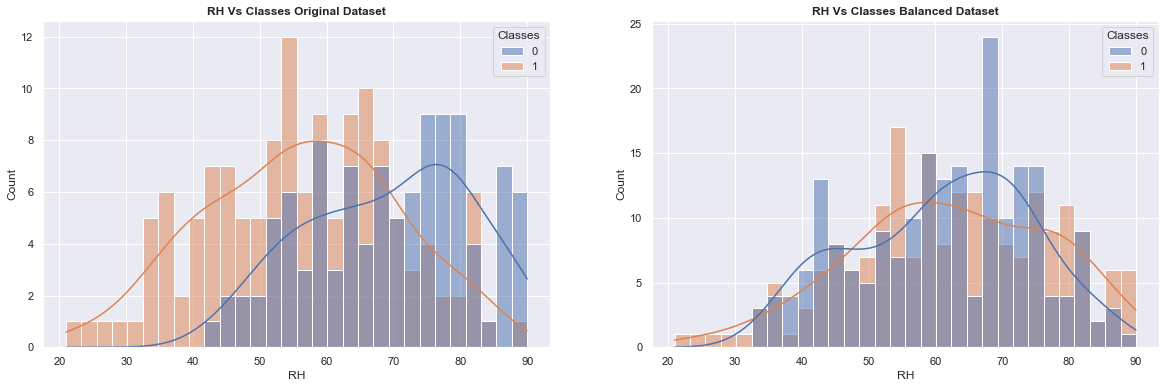

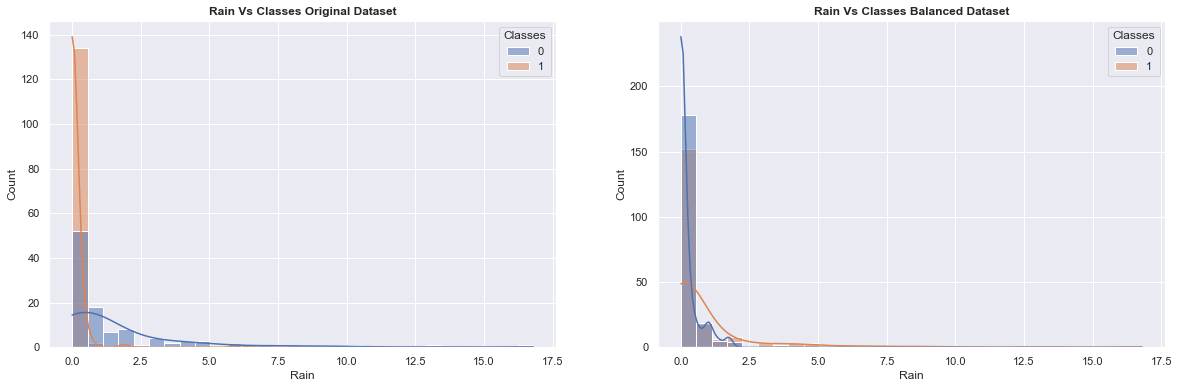

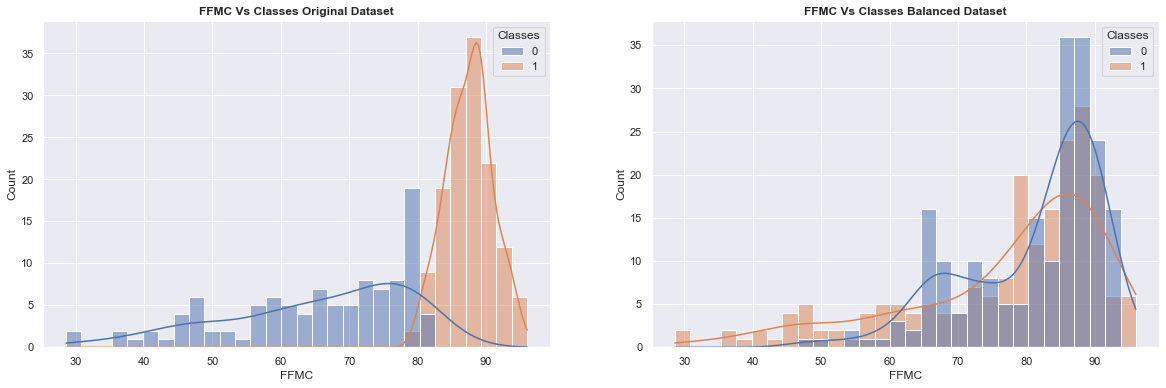

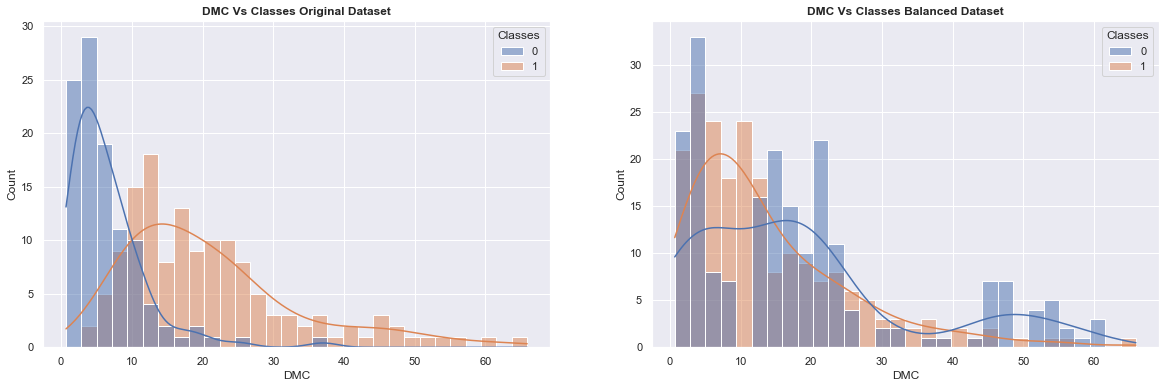

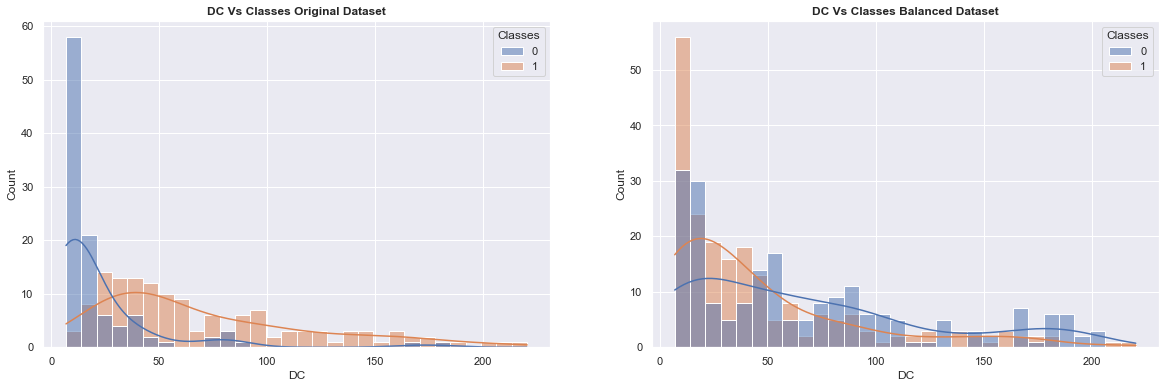

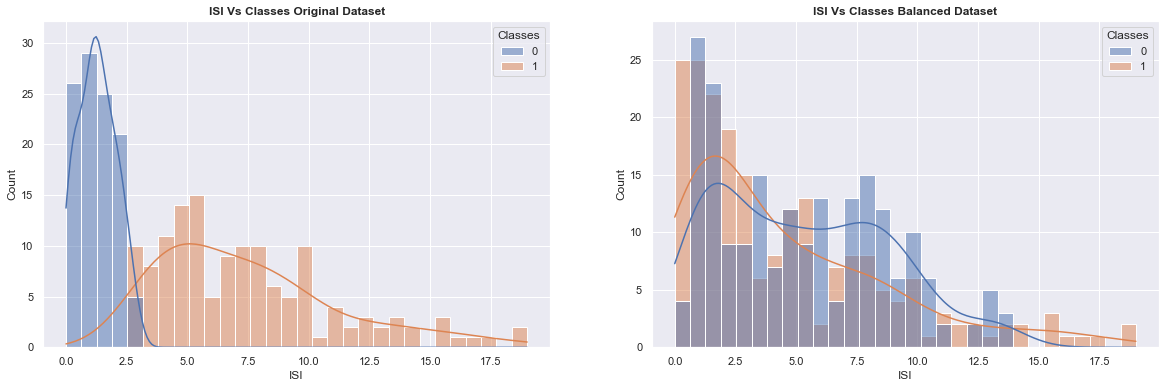

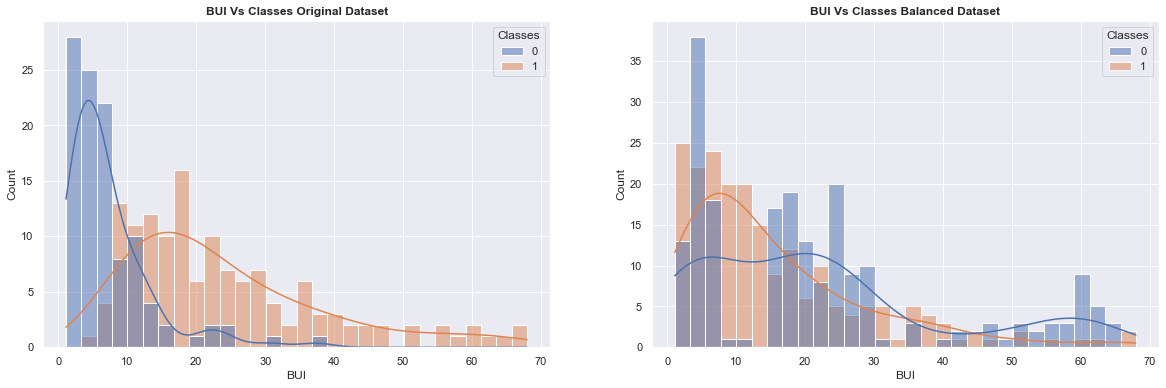

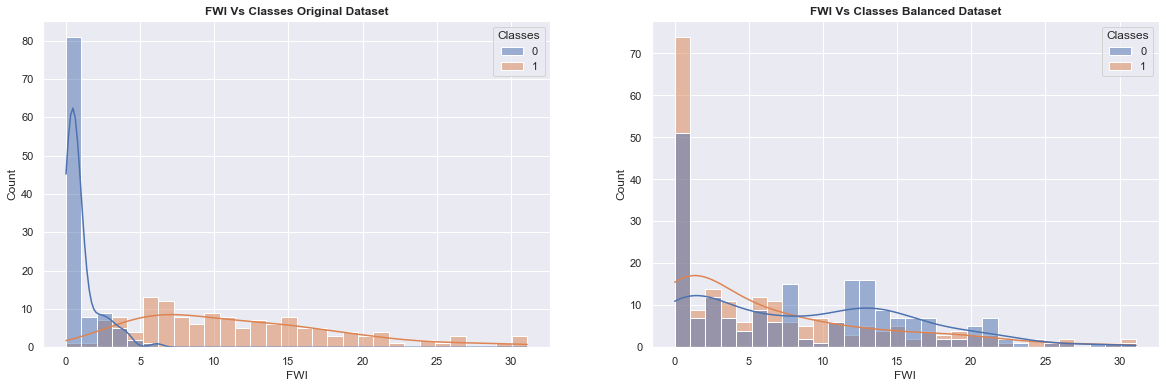

In [190]:
### Comparing Continuous numerical features with Classes
    
for i in continuous_features:
    plt.figure(figsize=(20,6))
    plt.subplot(121)
    sns.histplot(data=dataset, x=i, kde=True, bins=30, color='blue', hue='Classes')
    plt.title("{} Vs Classes Original Dataset".format(i),fontweight="bold")
    
    plt.subplot(122)
    sns.histplot(data=data_bal, x=i, kde=True, bins=30, color='blue', hue='Classes')
    plt.title("{} Vs Classes Balanced Dataset".format(i),fontweight="bold")

### <span style='color:blue'>Observations</span>

1. Originally for RH in range of 20 to 70 there were more fire cases, but now for the same range there are more non fire cases.
2. Originally for Rain in range 0 to 1 mm there were more fire Cases, but noe for the same range there are more non fire cases.
3. For FFMC there were more non fire cases in range of 30 to 80, but now the ratio of fire to non fire in same range is almost equal. 
4. For FFMC in range of 80 to 90, now there are more non fire cases than fire cases, which is in contradiction to original dataset.
5. For DMC the ratio of fire to non fire in complete range is now almost equal.
6. For DC there are more fire cases than non fire cases now in range of 0 to 40.
7. For ISI now there are more no. of fire cases than non fire cases in range of 0 to 3, where as from 5 to 13 the no of cases of non fire have increased significantly.
8. For BUI in range of 18 to 70 there is significant increase in cases of non fire than fire.
9. For FWI now there are more cases of fire in range of 0 to 7 as compared to non fire, where as there is significant increase in non fire cases in range 10 to 30.

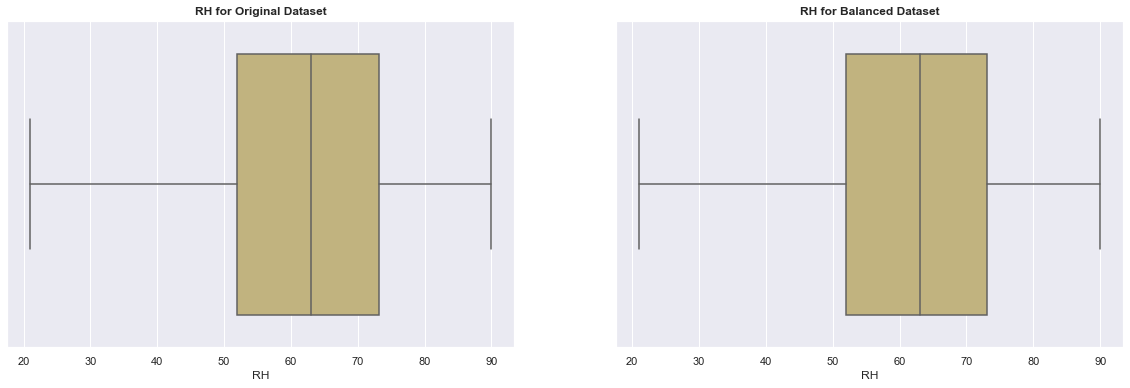

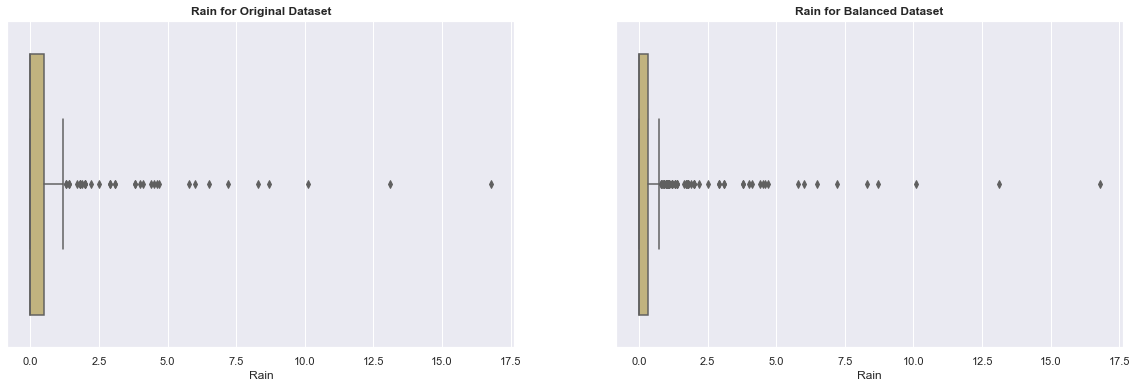

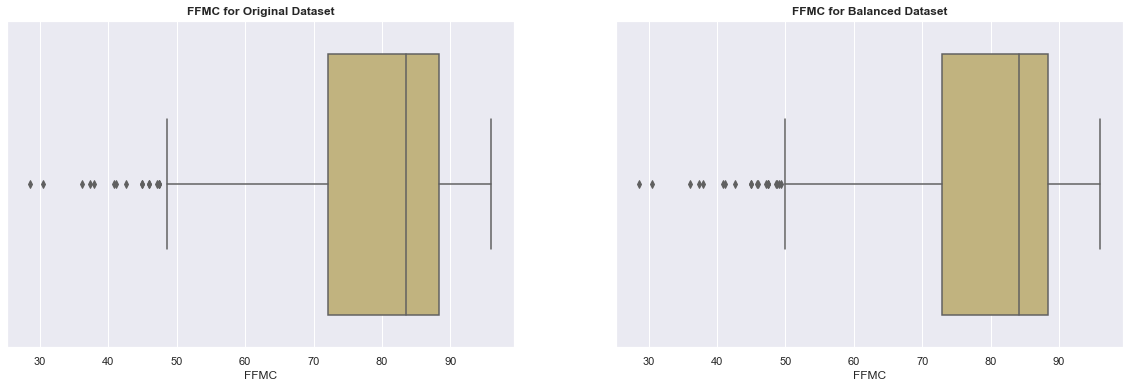

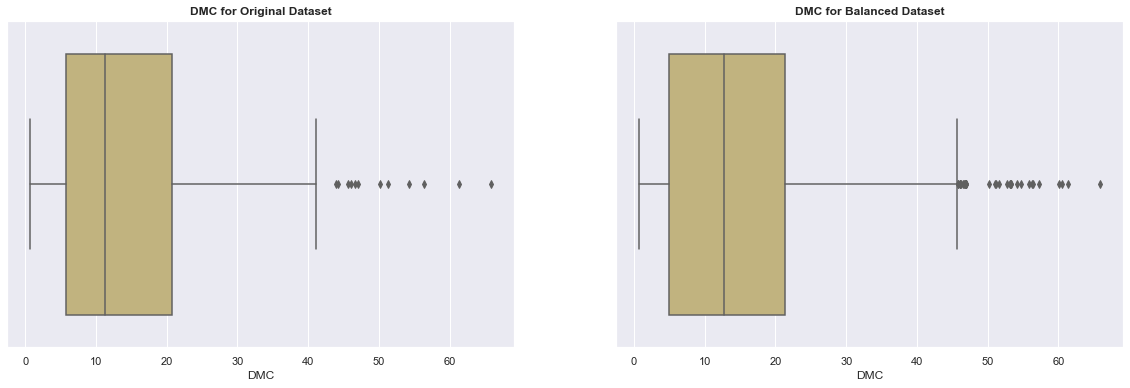

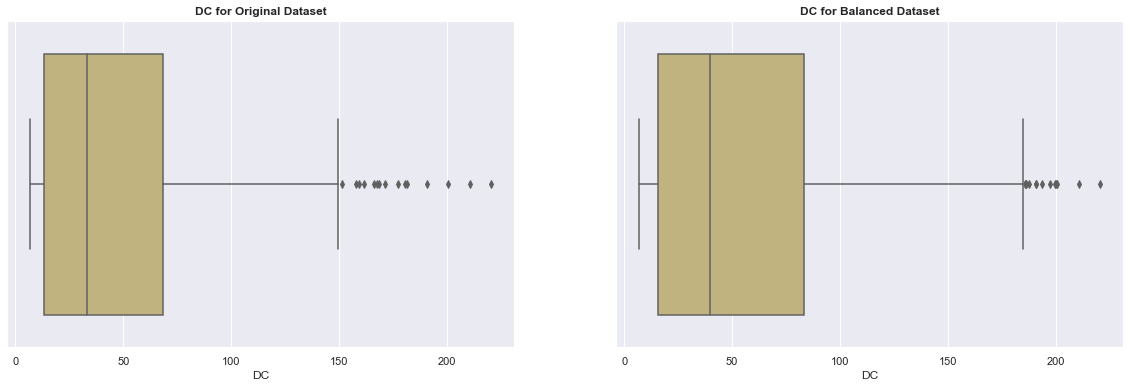

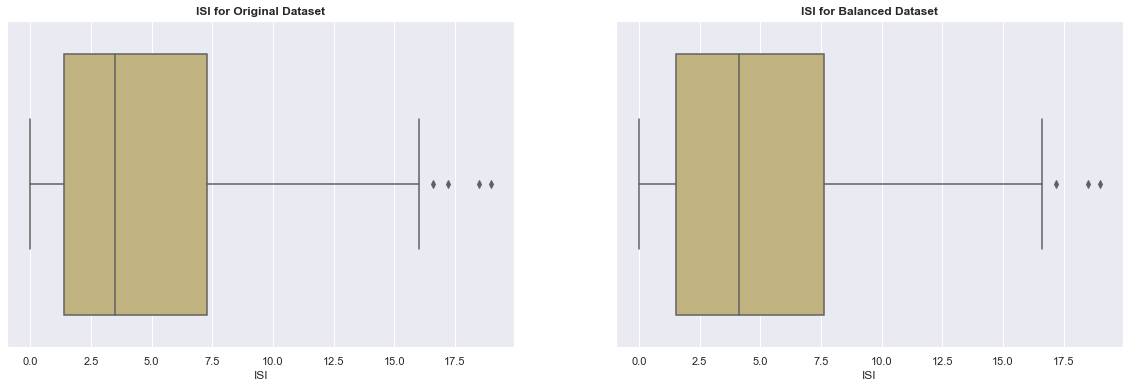

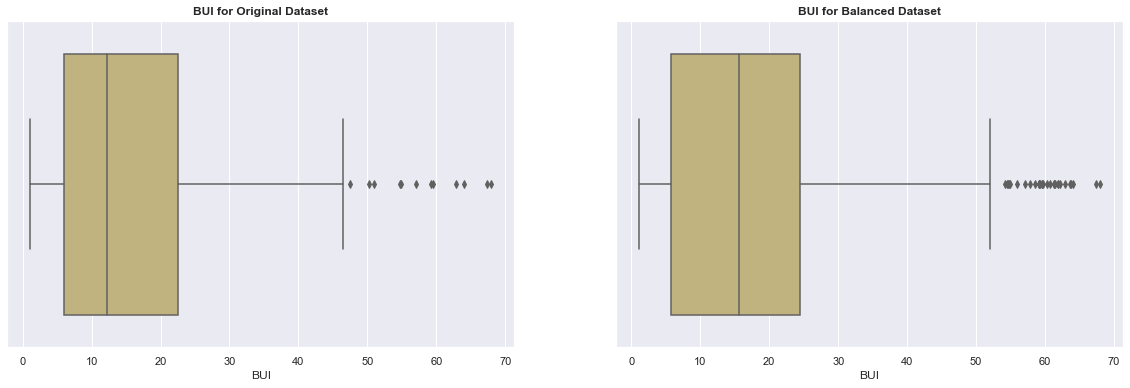

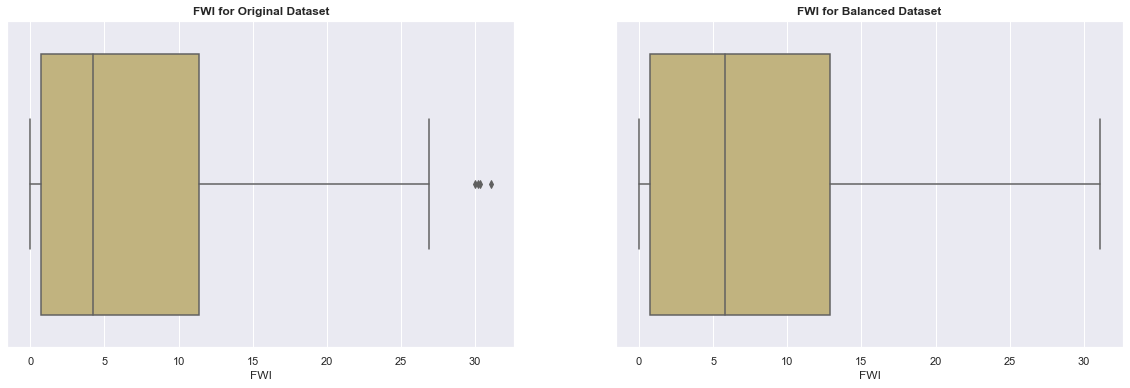

In [191]:
### Checking outliers in numerical features 
    
for i in continuous_features:
    plt.figure(figsize=(20,6))
    plt.subplot(121)
    sns.boxplot(data=dataset, x=i, color='y')
    plt.title("{} for Original Dataset".format(i), fontweight="bold")
    
    plt.subplot(122)
    sns.boxplot(data=data_bal, x=i, color='y')
    plt.title("{} for Balanced Dataset".format(i), fontweight="bold")

### <span style='color:blue'>Observations</span>
1. As no of Observations has increased in balance dataset, so there is significant increase in outliers in features that had outliers in original dataset.
2. There is no outlier addition in features that had no outliers in original dataset.
3. There is reduction in outliers for DC, ISI and FWI in comparision to original dataset.

In [194]:
corr1= round(data_bal[numerical_features+['Classes']].corr(),2)
corr1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.00,-0.07,0.18,-0.12,0.10,-0.08,0.28,0.60,0.63,0.28,0.62,0.47,0.10
month,-0.07,1.00,-0.11,0.10,0.01,0.02,0.03,0.02,0.09,0.06,0.04,0.06,-0.04
Temperature,0.18,-0.11,1.00,-0.66,-0.30,-0.28,0.67,0.40,0.32,0.65,0.38,0.56,-0.07
RH,-0.12,0.10,-0.66,1.00,0.23,0.19,-0.61,-0.30,-0.18,-0.67,-0.26,-0.53,0.03
Ws,0.10,0.01,-0.30,0.23,1.00,0.10,-0.08,0.14,0.23,0.04,0.18,0.10,0.00
Rain,-0.08,0.02,-0.28,0.19,0.10,1.00,-0.53,-0.25,-0.27,-0.33,-0.26,-0.31,0.21
FFMC,0.28,0.03,0.67,-0.61,-0.08,-0.53,1.00,0.58,0.53,0.77,0.58,0.72,-0.16
DMC,0.60,0.02,0.40,-0.30,0.14,-0.25,0.58,1.00,0.91,0.63,0.99,0.86,-0.16
DC,0.63,0.09,0.32,-0.18,0.23,-0.27,0.53,0.91,1.00,0.53,0.96,0.78,-0.21
ISI,0.28,0.06,0.65,-0.67,0.04,-0.33,0.77,0.63,0.53,1.00,0.61,0.91,-0.09


<AxesSubplot:>

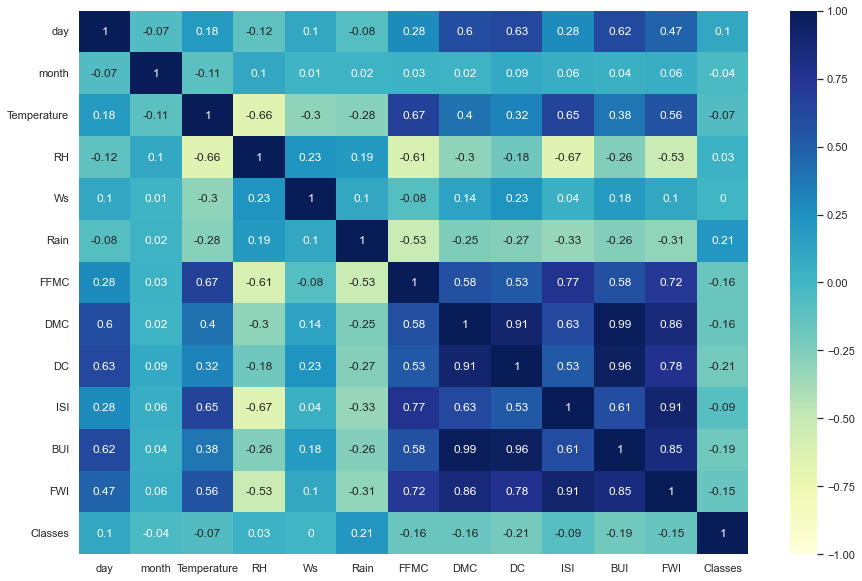

In [195]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr1, annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

### <span style='color:blue'>Observations</span>
1. The only significant change is that FFMC, DMC, DC, ISI, BUI, FWI had correlation coefficient more than 0.55 with Classes, now there is sginifcant decrease in correlation coefficient of these features with Classes.
2. Due to this there may be reduction in performance of new model with respect to old model.

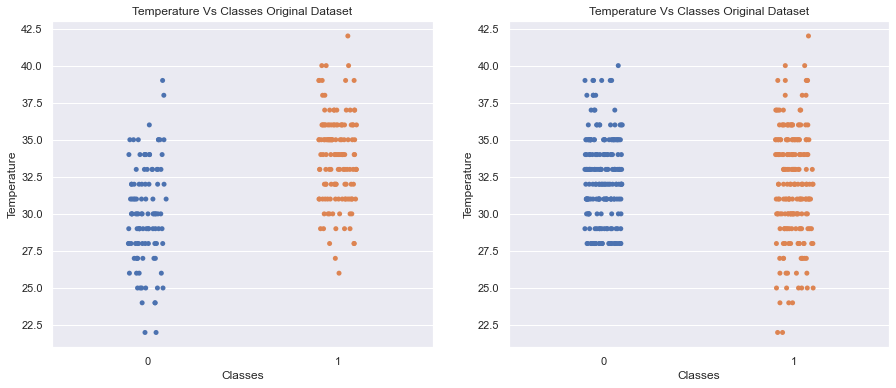

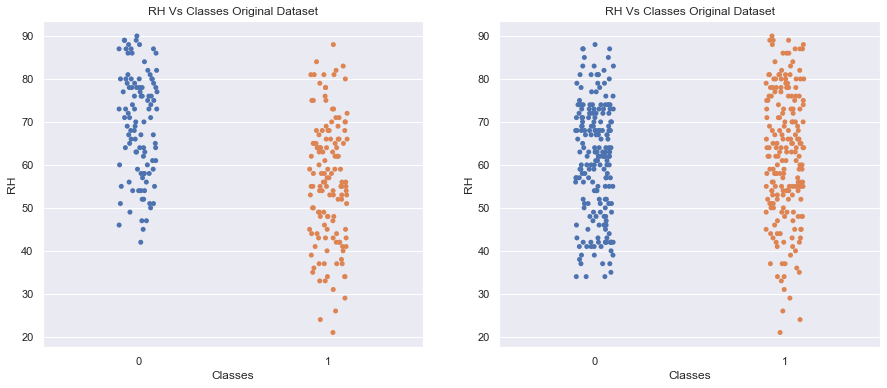

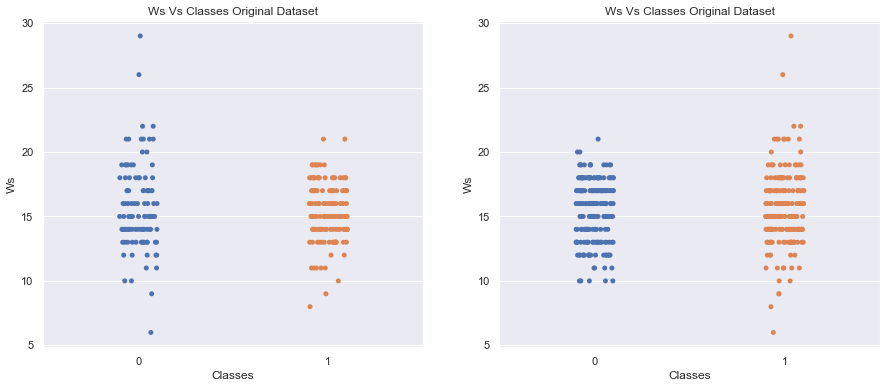

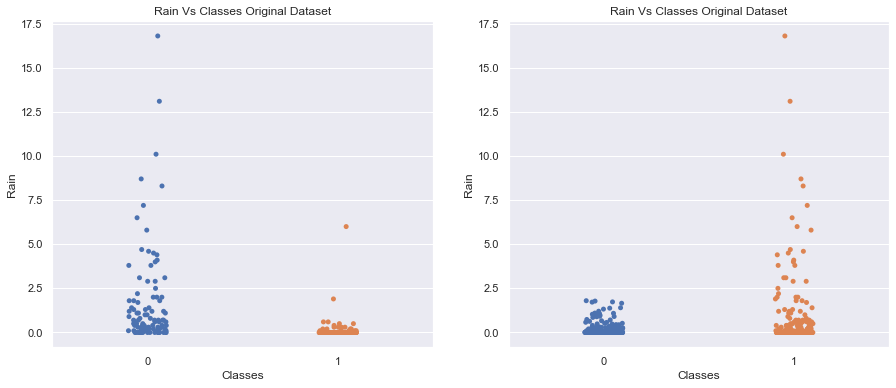

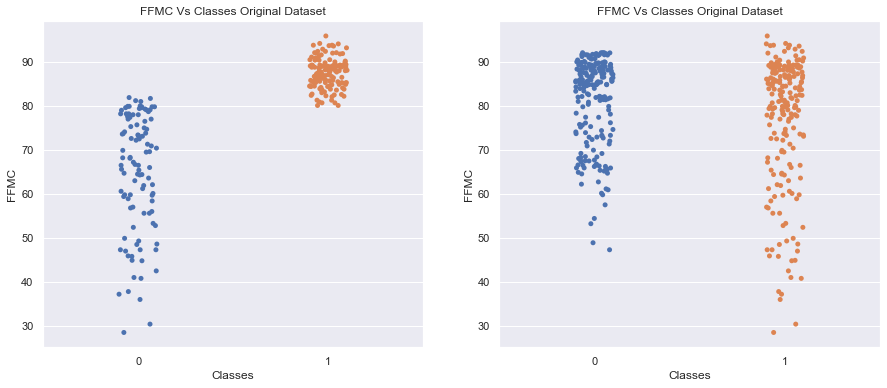

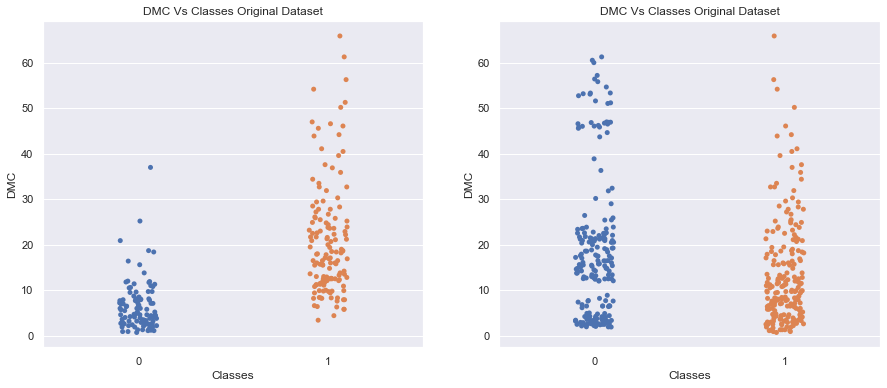

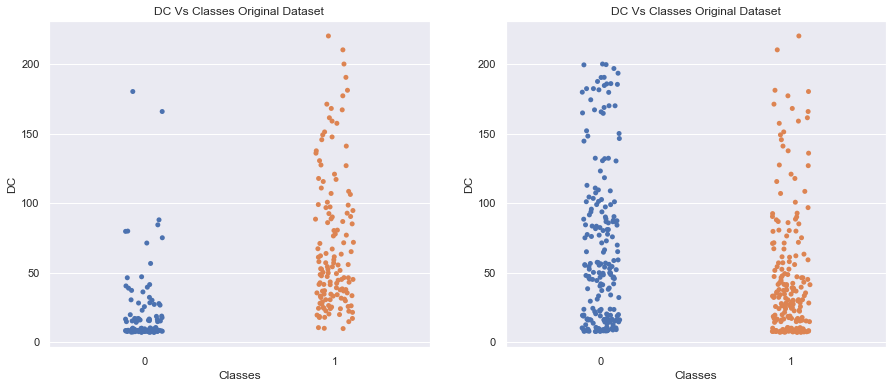

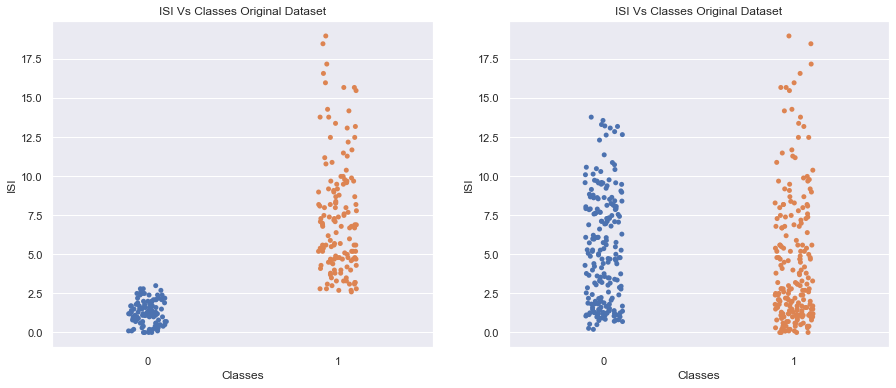

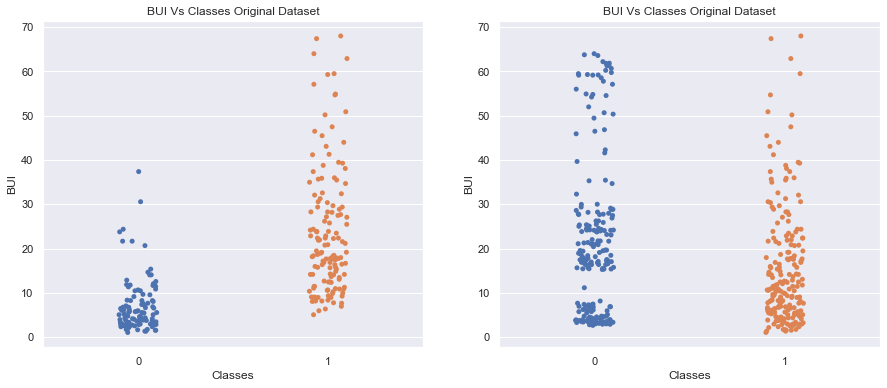

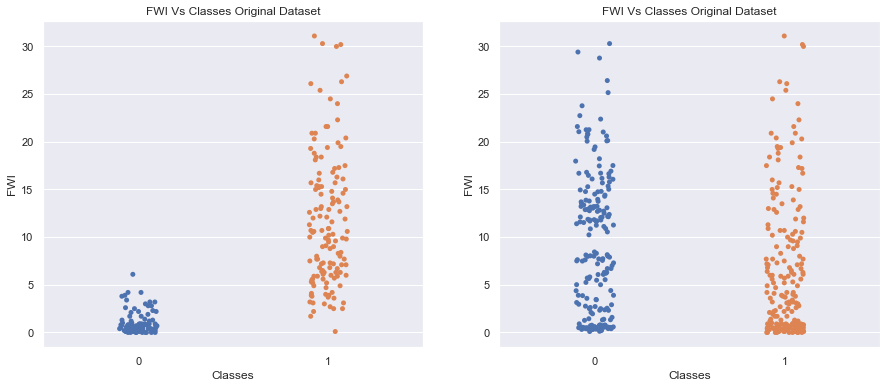

In [193]:
num_feature_custom=[feature for feature in numerical_features if feature not in ['day', 'month']]  
    
for i in num_feature_custom:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.stripplot(data=dataset, y=i, x='Classes')
    plt.title("{} Vs Classes Original Dataset".format(i))
    
    plt.subplot(122)
    sns.stripplot(data=data_bal, y=i, x='Classes')
    plt.title("{} Vs Classes Original Dataset".format(i))

### <span style='color:blue'>Observations</span>
1. Now there are more No. of cases of fire in temperature range between 22 to 27 as compared to original dataset, whereas the ratio of cases of fire to non fire has almost balenced out in temperature range of 27 to 37, which was in favour of fire for original dataset.
2. There is significant increase in No of cases of fire for RH greater than 60 as compared to original dataset.
3. There is increase in No of cases of fire for FFMC less than 80 as compared to original dataset.
4. There is Significant increase in No of cases of non fire for DMC greater than 20 as compared to original dataset.
4. There is Significant increase in No of cases of non fire for DC greater than 40 as compared to original dataset.
5. There is Significant increase in No of cases of non fire for ISI greater than 2.5 as compared to original dataset.
6. There is Significant increase in No of cases of fire for ISI less than 2.5 as compared to original dataset.
7. There is Significant increase in No of cases of non fire for BUI greater than 18 as compared to original dataset.
8. There is Significant increase in No of cases of fire for BUI less than 10 as compared to original dataset.
9. There is Significant increase in No of cases of non fire for FWI greater than 5 as compared to original dataset.
8. There is Significant increase in No of cases of fire for FWI less than 1 as compared to original dataset.

### <span style='color:red '>9.4 Splitting data into Training and Test data</span>

In [106]:
### random state train test split will be same with all people using random_state=16

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_bal, y_bal, test_size=0.30, random_state=16)

X_train1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
332,27,6,31,52,14,0.201401,81.346126,16.460877,85.813259,3.054529,22.058076,5.017461,0.000000
347,16,7,34,61,17,0.000000,87.530776,12.113845,52.116931,7.312928,17.562469,10.239700,0.000000
285,12,7,34,64,13,0.000000,88.661216,25.416078,80.283282,7.070152,28.634042,12.726808,0.149240
328,3,9,28,72,17,0.086970,69.312093,2.030299,15.778179,1.478179,3.043329,0.539090,0.130299
190,18,6,31,78,14,0.300000,56.900000,1.900000,8.000000,0.700000,2.400000,0.200000,0.000000


In [107]:
y_train1.head()

332    0
347    0
285    0
328    0
190    1
Name: Classes, dtype: int64

In [108]:
X_test1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
327,1,6,29,57,17,0.074373,65.460355,3.350418,7.653714,1.275209,3.371077,0.491736,0.0
330,17,7,34,60,17,0.000000,87.795511,12.060898,52.434613,7.492948,17.858972,10.546793,0.0
26,14,6,30,78,20,0.500000,59.000000,4.600000,7.800000,1.000000,4.400000,0.400000,0.0
319,18,8,35,55,18,0.000000,89.291521,20.581845,112.842769,9.611244,28.210048,16.169032,0.0
30,21,9,31,55,11,0.000000,87.800000,16.500000,57.900000,5.400000,19.200000,8.300000,0.0


In [109]:
y_train1.head()

332    0
347    0
285    0
328    0
190    1
Name: Classes, dtype: int64

In [110]:
### both will have same shape
X_train1.shape, y_train1.shape

((288, 13), (288,))

In [111]:
### both will have same shape
X_test1.shape, y_test1.shape

((124, 13), (124,))

### <span style='color:red '>9.4 Standardisation/ Feature scaling the dataset</span>

In [112]:
### using fit_transform to Standardize the train data
X_train1=scaler.fit_transform(X_train1)
X_train1

array([[ 1.35962522, -1.42233545, -0.34932259, ...,  0.19270021,
        -0.36344564, -0.97986971],
       [ 0.10458656, -0.45164206,  0.55161687, ..., -0.08467537,
         0.33626637, -0.97986971],
       [-0.35179114, -0.45164206,  0.55161687, ...,  0.59843243,
         0.66950651, -0.6487928 ],
       ...,
       [-1.15045211,  0.51905132,  0.55161687, ..., -0.45872519,
        -0.21839951, -0.97986971],
       [ 0.56096425,  0.51905132,  0.85193002, ...,  0.68479639,
         1.78148924,  0.97325949],
       [ 1.70190849,  1.48974471, -2.1512015 , ..., -1.0201884 ,
        -1.02232137, -0.97986971]])

In [113]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test1=scaler.transform(X_test1)
X_test1

array([[-1.6068298 , -1.42233545, -0.9499489 , ..., -0.96027366,
        -0.9698338 , -0.97986971],
       [ 0.21868098, -0.45164206,  0.55161687, ..., -0.06638133,
         0.37741282, -0.97986971],
       [-0.12360229, -1.42233545, -0.64963574, ..., -0.89678989,
        -0.98212528, -0.97986971],
       ...,
       [ 0.3327754 ,  0.51905132,  1.15224317, ...,  0.52846289,
         1.12147026, -0.97986971],
       [ 0.7891531 ,  0.51905132,  1.45255632, ...,  1.63904947,
         1.38944422,  1.23854831],
       [ 0.67505867,  0.51905132,  1.15224317, ...,  1.22566446,
         1.42964031, -0.97986971]])

### <span style='color:red '>9.5 Model</span>
### <span style='color:red '>1.0 Logistic Regression 2.0</span>

In [152]:
### Creating a Logistic regression object
logistic_reg1=LogisticRegression()
logistic_reg1

LogisticRegression()

In [153]:
### Passing independant and dependant training data to the Logistic regression model created initially
logistic_reg1.fit(X_train1,y_train1)

LogisticRegression()

### <span style='color:red '>1.1 Using Above Model to get prediction for test data</span>

In [154]:
logistic_reg_pred1=logistic_reg1.predict(X_test1)
logistic_reg_pred1

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

### <span style='color:red '>1.2.0 Performance Metrics</span>

### <span style='color:red '>1.2.1 Confusion Matrix</span>

In [155]:
confusion_mat1=confusion_matrix(y_test1, logistic_reg_pred1)
confusion_mat1

array([[45, 19],
       [25, 35]], dtype=int64)

In [156]:
truly_positive=confusion_mat1[0][0]
falsely_positive=confusion_mat1[0][1]
falsely_negative=confusion_mat1[1][0]
truly_negative=confusion_mat1[1][1]

### <span style='color:red '>1.2.2 Accuracy Score</span>

In [157]:
### accuracy using accuracy_score
accuracy1=round(accuracy_score(y_test1, logistic_reg_pred1),4)
accuracy1

0.6452

In [158]:
### manual calcualtion for accuracy
accuracy_manual1=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual1))

Accuracy of our model is 0.6452


### <span style='color:red '>1.2.3 Precision Score</span>

In [159]:
precision_manual1=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual1))

Precision of our model is 0.7031


### <span style='color:red '>1.2.4 Recall Score</span>

In [160]:
recall_manual1=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall_manual1))

Recall of our model is 0.6429


### <span style='color:red '>1.2.5 F-1 Score</span>

1. Giving equal importance to falsely positive and falsely negative

In [161]:
f1_score1=2*(precision_manual1*recall_manual1)/(precision_manual1+recall_manual1)
print("F-1 Score of our model is {} ".format(round(f1_score1,4)))

F-1 Score of our model is 0.6717 


### <span style='color:red '>1.2.6 Classification Report</span>

In [162]:
print(classification_report(y_test1, logistic_reg_pred1))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        64
           1       0.65      0.58      0.61        60

    accuracy                           0.65       124
   macro avg       0.65      0.64      0.64       124
weighted avg       0.65      0.65      0.64       124



## <span style='color:red '>10.0 Saving the Model for imbalanced dataset</span>

In [163]:
### Writing model to a file that will be used while deployment
with open('model_Logistic_regression_algerian_ff_imbalanced.sav','wb') as f:
    pickle.dump(logistic_reg1,f)

## <span style='color:red '>11.0 Comparing Logistic Regression Model for Original and Imbalanced Dataset</span>

### <span style='color:red '>11.1 Performance of Logistic Regression Model for Original Dataset</span>

In [166]:
print("The Performance of Model for Original dataset: \n{}".format(classification_report(y_test, logistic_reg_pred)))

The Performance of Model for Original dataset: 
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.95      0.97      0.96        38

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



### <span style='color:red '>11.2 Performance of Logistic Regression Model for Imbalanced Dataset</span>

In [165]:
print("The Performance of Model for Imbalanced dataset: \n{}".format(classification_report(y_test1, logistic_reg_pred1)))

The Performance of Model for Imbalanced dataset: 
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        64
           1       0.65      0.58      0.61        60

    accuracy                           0.65       124
   macro avg       0.65      0.64      0.64       124
weighted avg       0.65      0.65      0.64       124



### <span style='color:blue'>Observations</span>
1. It is clearly visible that creating imbalance on purpose degrades the dataset when we try to balance the imbalanced dataset.
2. This results in decrease in the performance of model.